In [2]:
import pandas as pd
import numpy as np
from scipy import signal
from scipy.stats import entropy
from statsmodels.nonparametric.smoothers_lowess import lowess
from matplotlib import pyplot as plt
%matplotlib inline
import ruptures as rpt
from ruptures.base import BaseCost

In [3]:
plt.style.use('seaborn-poster')
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

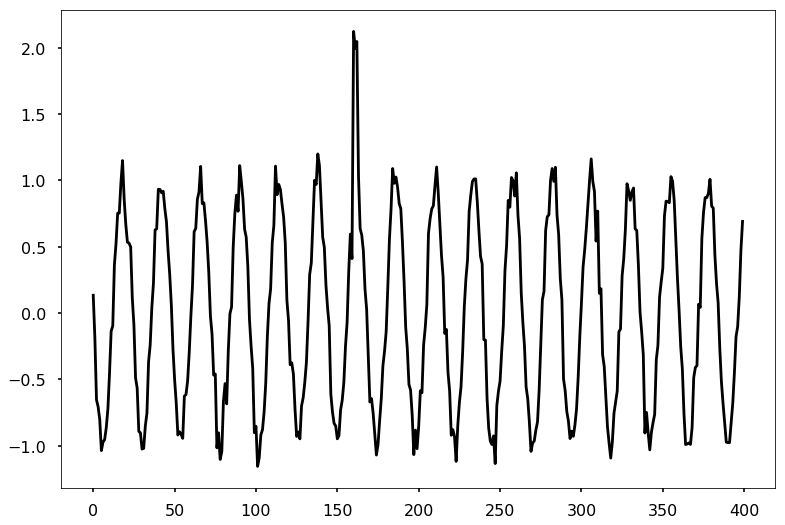

In [4]:
np.random.seed(10)
signal = np.cos(2*np.pi/24 * np.arange(0, 400) + (np.pi/2))
signal[160] = 2
signal[161] = 2
signal[162] = 2
noise = np.random.normal(0,0.1,400)
plt.plot(signal+noise,color='black')
plt.savefig('../tex/images/local_cp.png')
plt.show()

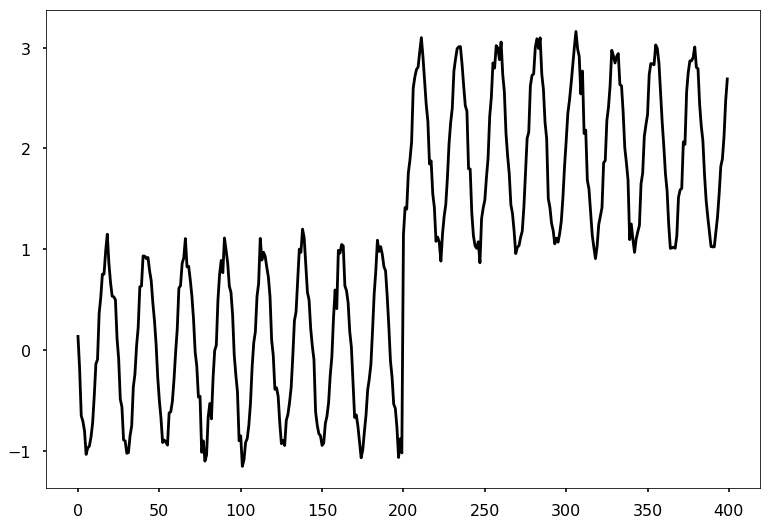

In [4]:
np.random.seed(10)
signal = np.cos(2*np.pi/24 * np.arange(0, 400) + (np.pi/2))
noise = np.random.normal(0,0.1,400)
signal[200:] = signal[200:]+2
plt.plot(signal+noise,color='black')
plt.savefig('../tex/images/global_cp.png')
plt.show()

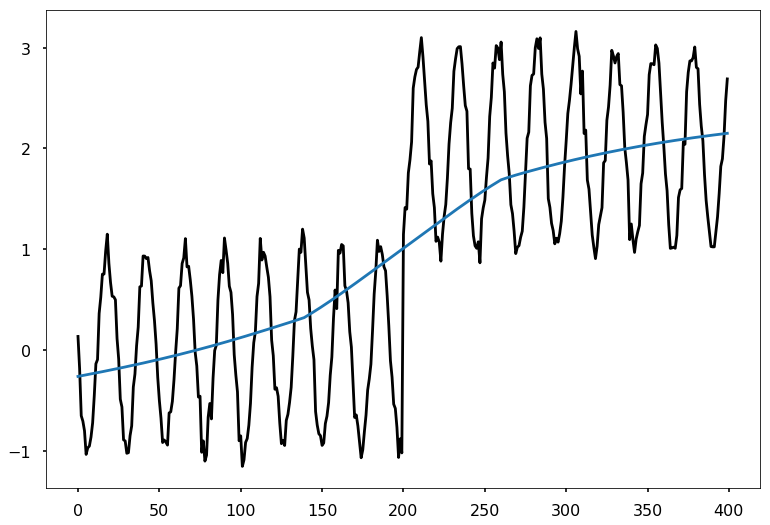

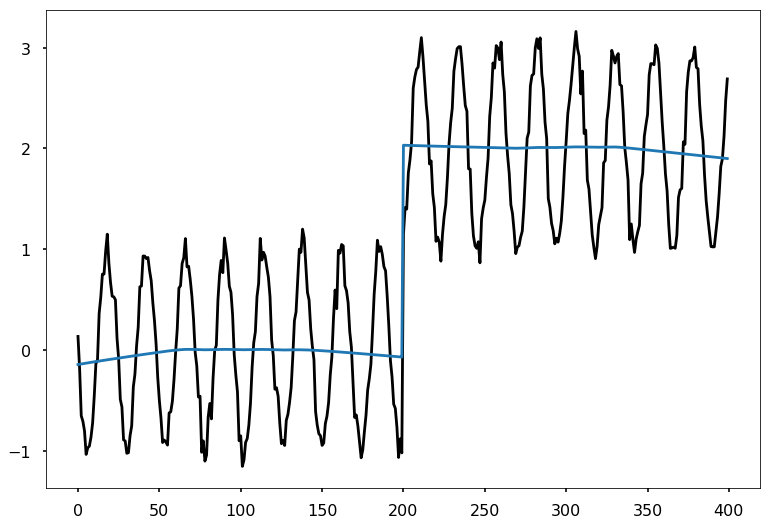

In [5]:
np.random.seed(10)
signal = np.cos(2*np.pi/24 * np.arange(0, 400) + (np.pi/2))
noise = np.random.normal(0,0.1,400)
signal[200:] = signal[200:]+2
signal = signal+noise

plt.plot(signal,color='black')
plt.plot(lowess(signal, range(0,len(signal)),frac=0.7,return_sorted=False, is_sorted=True))
plt.savefig('../tex/images/trend_fallacy.png')
plt.show()

plt.plot(signal,color='black')
plt.plot(np.hstack(
            (lowess(signal[0:200], range(0,len(signal[0:200])), frac=0.7, return_sorted=False, is_sorted=True),
             lowess(signal[200:], range(0,len(signal[200:])), frac=0.7, return_sorted=False, is_sorted=True))))
plt.savefig('../tex/images/trend_succeed.png')
plt.show()

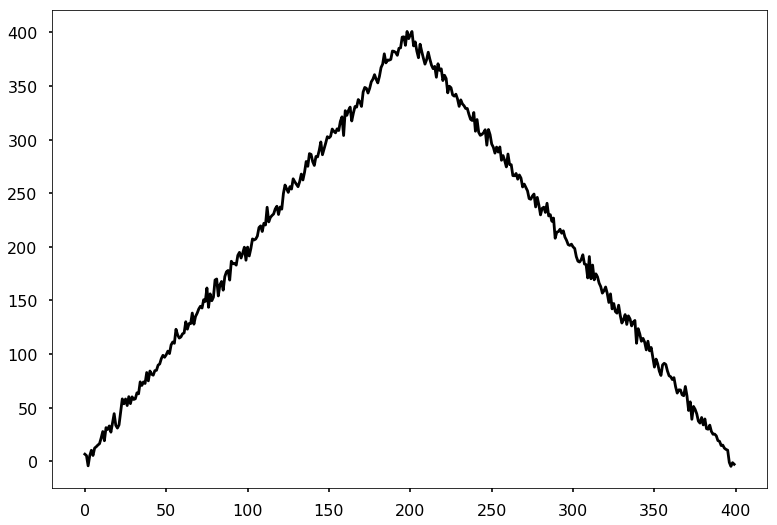

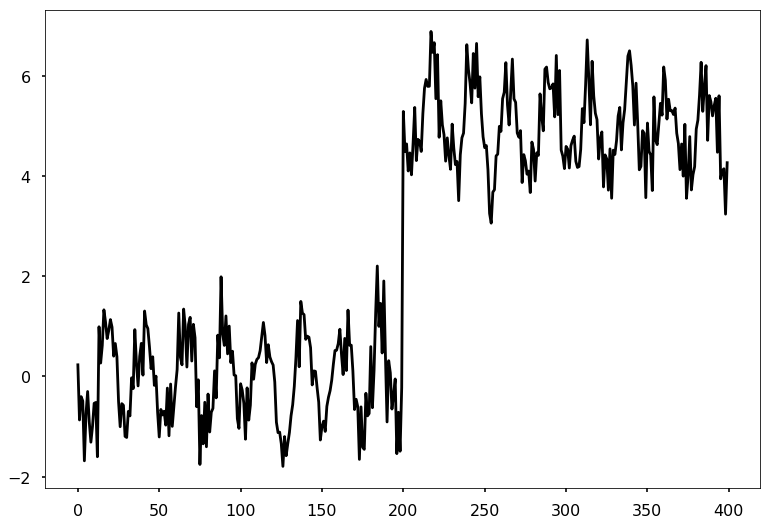

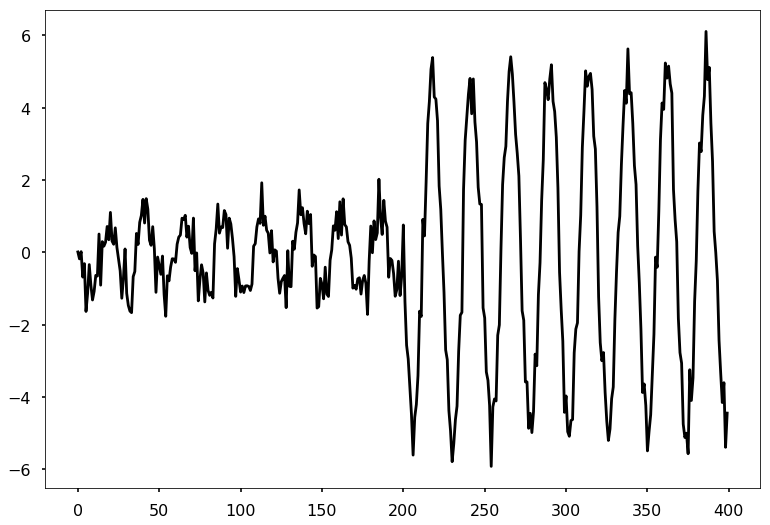

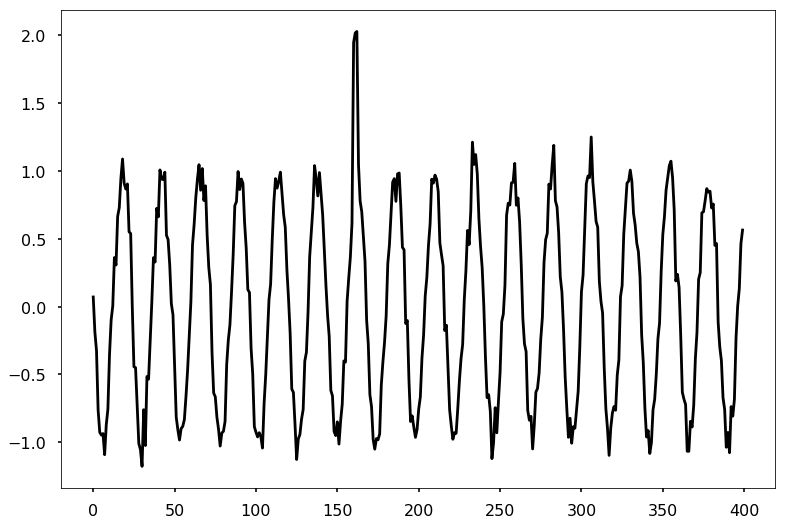

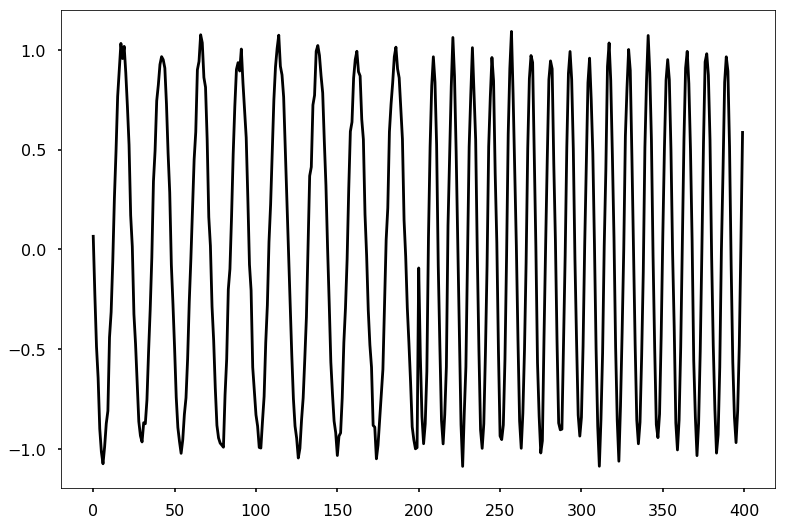

In [30]:
np.random.seed(10)
x = np.arange(0, 200)
period = 2*np.pi/24
noise = np.random.normal(0,5,400)
signal = 2*x + np.cos(period * x + (np.pi/2))
signal = np.append(signal, signal[-1] - 2*x + np.cos(period * x + (np.pi/2)))
signal = signal+noise
plt.plot(signal, color='black')
plt.savefig('../tex/images/examples_trend.png')
plt.show()

x = np.arange(0, 200)
period = 2*np.pi/24
noise = np.random.normal(0,0.5,400)
signal = np.cos(period * x + (np.pi/2))
signal = np.append(signal, 5 + np.cos(period * x + (np.pi/2)))
signal = signal + noise
plt.plot(signal, color='black')
plt.savefig('../tex/images/examples_mean.png')
plt.show()

x = np.arange(0, 200)
period = 2*np.pi/24
noise = np.random.normal(0,0.5,400)
signal = np.cos(period * x + (np.pi/2))
signal = np.append(signal, 5*np.cos(period * x + (np.pi/2)))
signal = signal + noise
plt.plot(signal, color='black')
plt.savefig('../tex/images/examples_variance.png')
plt.show()

signal = np.cos(2*np.pi/24 * np.arange(0, 400) + (np.pi/2))
signal[160] = 2
signal[161] = 2
signal[162] = 2
noise = np.random.normal(0,0.1,400)
plt.plot(signal+noise,color='black')
plt.savefig('../tex/images/examples_outlier.png')
plt.show()

x = np.arange(0, 200)
period = 2*np.pi/24
noise = np.random.normal(0,0.05,400)
signal = np.cos(period * x + (np.pi/2))
signal = np.append(signal, np.cos(2 * period * x + (np.pi/2)))
signal = signal + noise
plt.plot(signal,color='black')
plt.savefig('../tex/images/examples_periodic.png')
plt.show()

In [5]:
df_1 = pd.read_csv('change_point_example_3.csv', sep=',')

In [101]:
# def average_smoothing(time_series, window):
#     return(np.convolve(time_series, np.ones((window,))/window, mode='valid'))

In [ ]:
days = dates.DayLocator()
hours = dates.HourLocator()
dfmt = dates.DateFormatter('%b %d')

datemin = datetime(2015, 1, 4, 0, 0)
datemax = datetime(2015, 1, 12, 0, 0)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(dfmt)
ax.xaxis.set_minor_locator(hours)
ax.set_xlim(datemin, datemax)
ax.set_ylabel('Temperature (F)')
ax.plot(d, t, linewidth=2)
fig.set_size_inches(8, 4)

In [24]:
from matplotlib import dates
from datetime import datetime
import sys

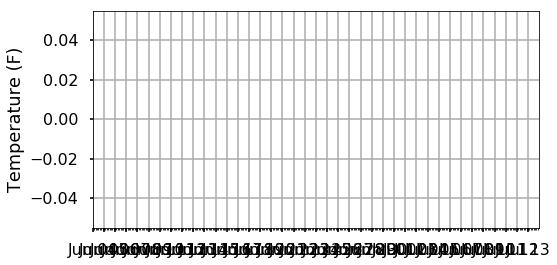

In [28]:
d = []
t = []
for line in sys.stdin:
    dstamp, temp = line.rstrip().split('\t')
    d.append(datetime.strptime(dstamp, '%Y-%m-%d-%H-%M'))
    t.append(int(temp))

days = dates.DayLocator()
hours = dates.HourLocator(interval=3)
dfmt = dates.DateFormatter('%b %d')

datemin = datetime(2018, 6, 4, 0, 0)
datemax = datetime(2018, 7, 13, 23, 59, 59)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(dfmt)
ax.xaxis.set_minor_locator(hours)
ax.set_xlim(datemin, datemax)
ax.set_ylabel('Temperature (F)')
ax.grid(True)
ax.plot(d, t, linewidth=2)
fig.set_size_inches(8, 4)

plt.savefig('temperatures.pdf', format='pdf')

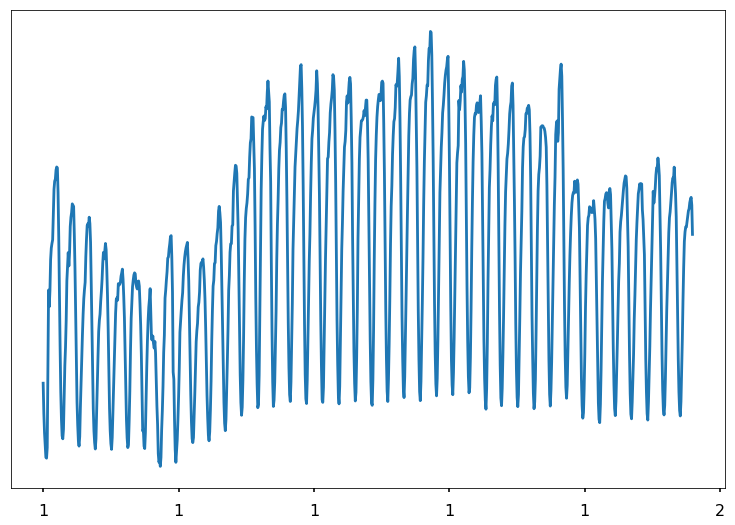

In [21]:
ts = df_1.loc[df_1['change_point_type'] == 'normal', 'impressions'].reset_index()['impressions']
# x = df_1.loc[df_1['change_point_type'] == 'normal', 'event_hourly_time']
plt.plot(ts)

# labels = [i for i in range(0,960)]
labels = [1,1,1,1,1,1,2,2]
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().set_xticklabels(labels)
# plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/001_normal_1.png')
plt.show()

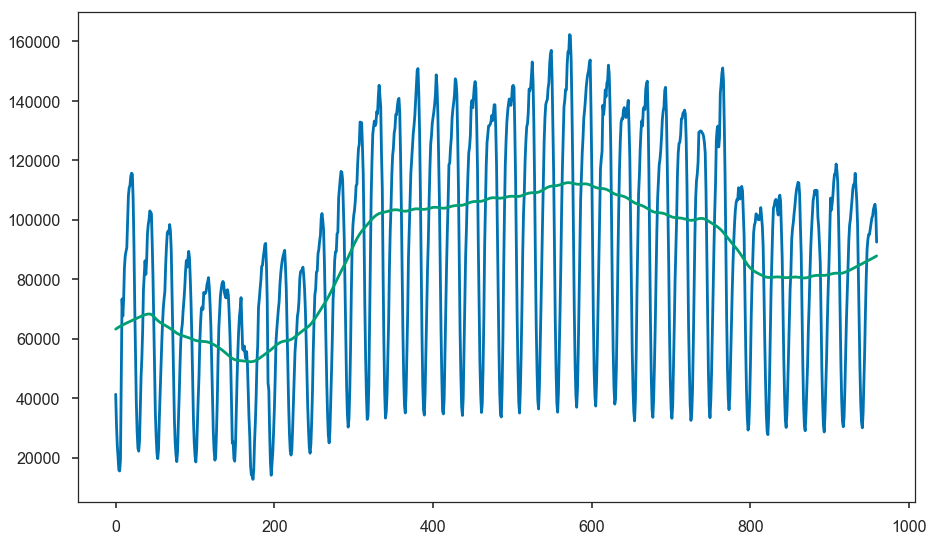

In [21]:
plt.figure(figsize = (15,9))
ts = df_1.loc[df_1['change_point_type'] == 'normal', 'impressions'].reset_index()['impressions']
plt.plot(ts)
plt.plot(lowess(ts, range(0,len(ts)), frac=0.1, return_sorted=False, is_sorted=True))
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/001_normal_2.png')
plt.show()

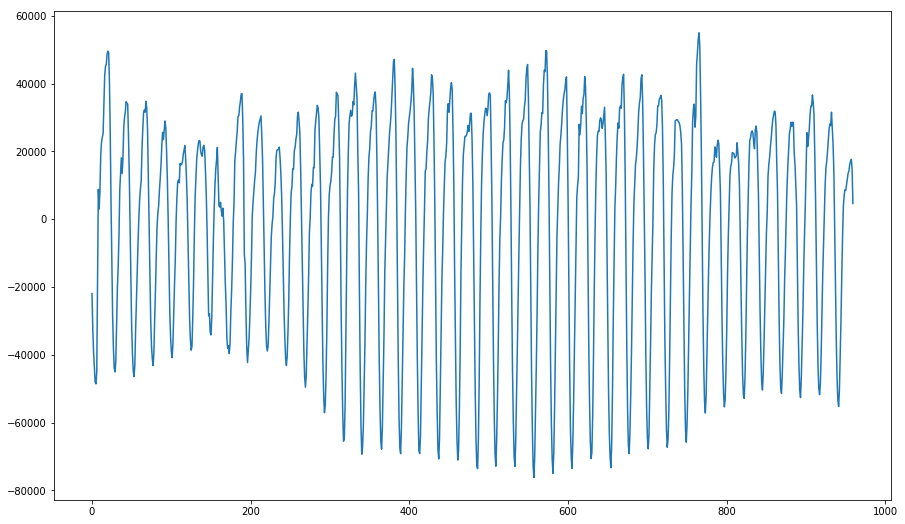

In [76]:
plt.figure(figsize = (15,9))
ts = df_1.loc[df_1['change_point_type'] == 'normal', 'impressions'].reset_index()['impressions']
plt.plot(ts - lowess(ts, range(0,len(ts)), frac=0.1, return_sorted=False, is_sorted=True))
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/001_normal_3.png')
plt.show()

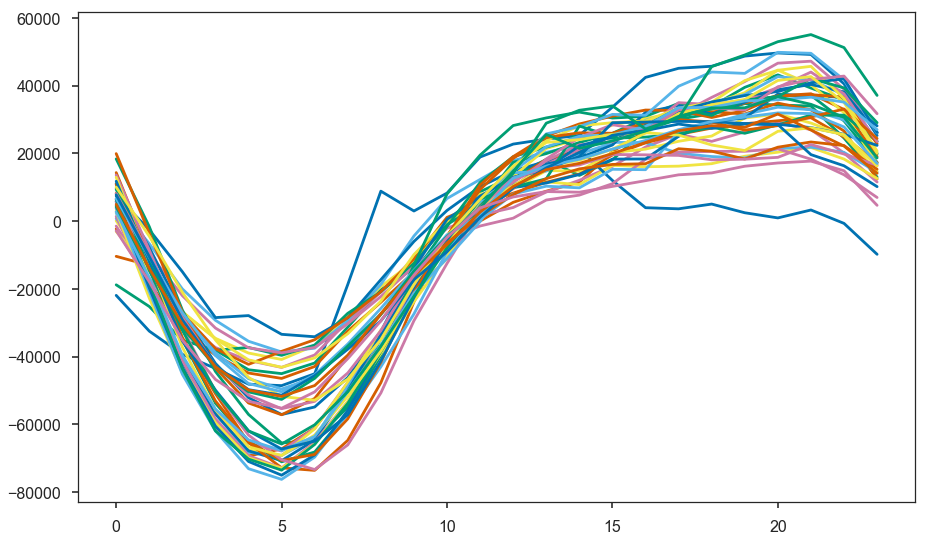

In [22]:
df = df_1.loc[df_1['change_point_type'] == 'normal', ['event_hourly_time', 'impressions']].copy()
df['impressions'] = (ts - lowess(ts, range(0,len(ts)), frac=0.1, return_sorted=False, is_sorted=True)).values
df['event_hourly_time'] = pd.to_datetime(df.event_hourly_time)
df = df.set_index('event_hourly_time')

df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour
data_by_day = df.resample('h').mean().set_index(['month','day', 'hour']).unstack(['month','day'])
plt.figure(figsize = (15,9))
plt.plot(data_by_day['impressions'])
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/001_normal_4.png')
plt.show()

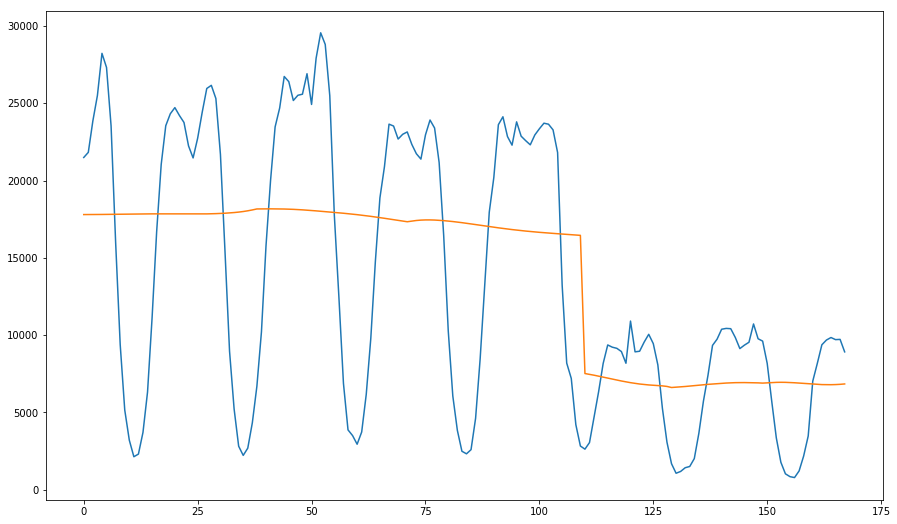

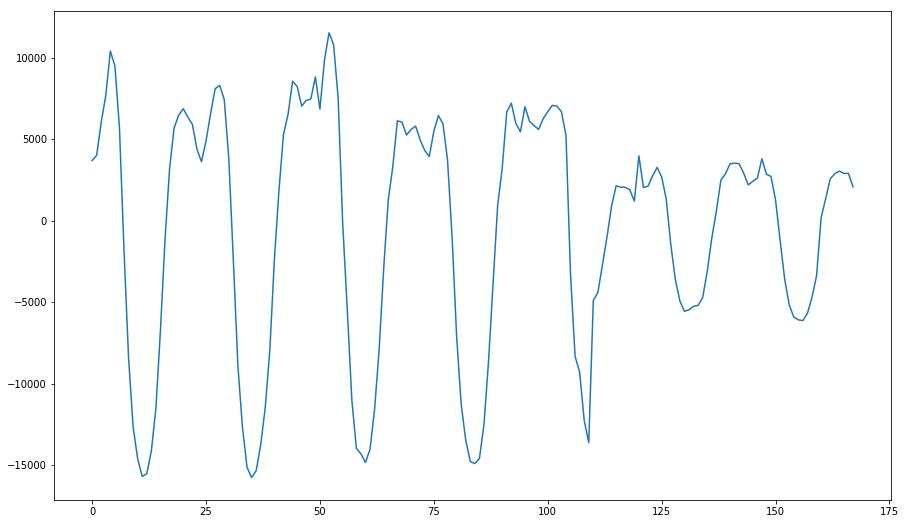

In [78]:
plt.figure(figsize = (15,9))
ts = df_1.loc[df_1['change_point_type'] == 'mean', 'impressions'].reset_index()['impressions']
plt.plot(ts)
plt.plot(np.hstack(
            (lowess(ts[0:110], range(0,len(ts[0:110])), frac=0.7, return_sorted=False, is_sorted=True),
             lowess(ts[110:], range(0,len(ts[110:])), frac=0.7, return_sorted=False, is_sorted=True))))
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/002_mean.png')
plt.show()

plt.figure(figsize = (15,9))
plt.plot(ts - np.hstack(
            (lowess(ts[0:110], range(0,len(ts[0:110])), frac=0.7, return_sorted=False, is_sorted=True),
             lowess(ts[110:], range(0,len(ts[110:])), frac=0.7, return_sorted=False, is_sorted=True))))
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/003_variance.png')
plt.show()

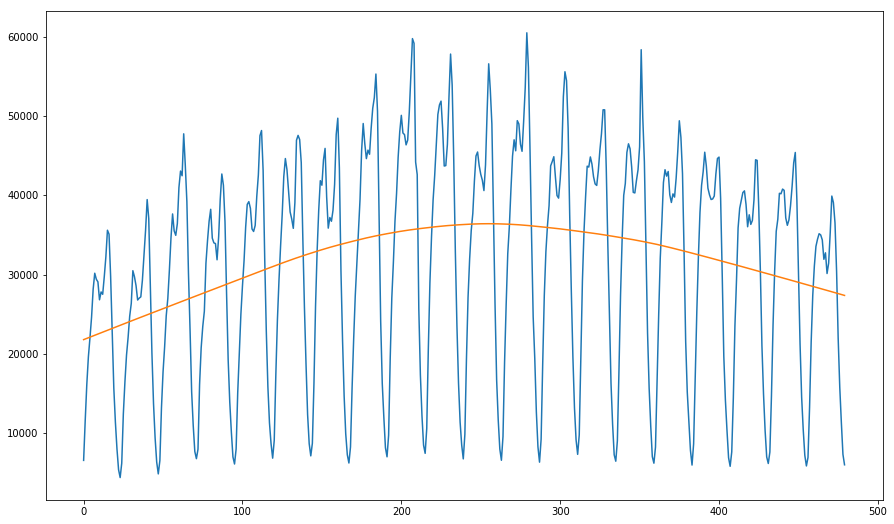

In [79]:
plt.figure(figsize = (15,9))
ts = df_1.loc[df_1['change_point_type'] == 'trend', 'impressions'].reset_index()['impressions']
plt.plot(ts)
plt.plot(lowess(ts, range(0,len(ts)), frac=0.5, return_sorted=False, is_sorted=True))
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/004_trend.png')
plt.show()

In [137]:
# plt.figure(figsize = (15,9))
# plt.plot(df_1.loc[df_1['change_point_type'] == 'variance', 'impressions'].reset_index()['impressions'])
# # plt.plot(average_smoothing(df_1.loc[df_1['change_point_type'] == 'variance', 'impressions'],24))
# plt.show()

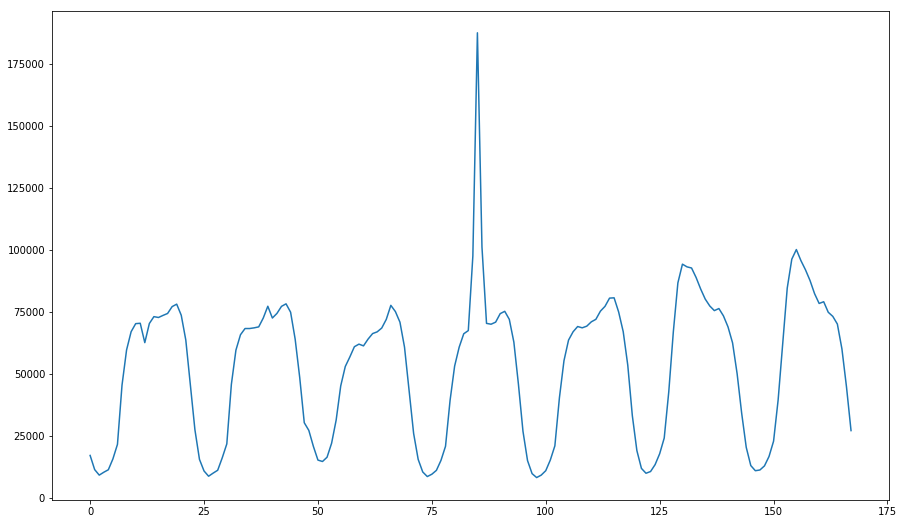

In [80]:
plt.figure(figsize = (15,9))
plt.plot(df_1.loc[df_1['change_point_type'] == 'point', 'impressions'].reset_index()['impressions'])
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/005_point.png')
plt.show()

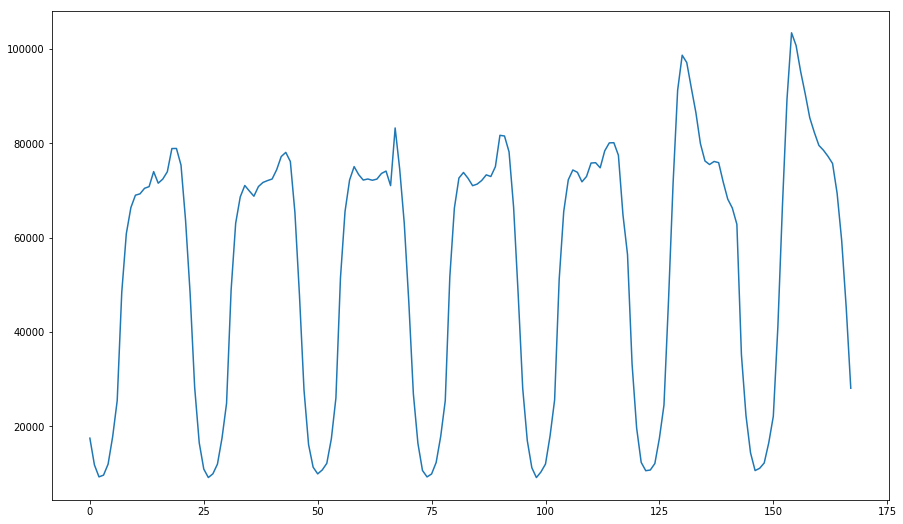

In [81]:
plt.figure(figsize = (15,9))
plt.plot(df_1.loc[df_1['change_point_type'] == 'period', 'impressions'].reset_index()['impressions'])
# plt.title('Trend change', fontsize=20)
# plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/001_trend_change.png')
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/006_structure.png')
plt.show()

In [117]:
df_2 = pd.read_csv('case_1.csv', sep=',')

In [118]:
df_2.head()

app_type          tx_datetime  requests
0  clean app  2018-06-22T00:00:00       444
1  clean app  2018-06-22T00:01:00       404
2  clean app  2018-06-22T00:02:00       382
3  clean app  2018-06-22T00:03:00       389
4  clean app  2018-06-22T00:04:00       391

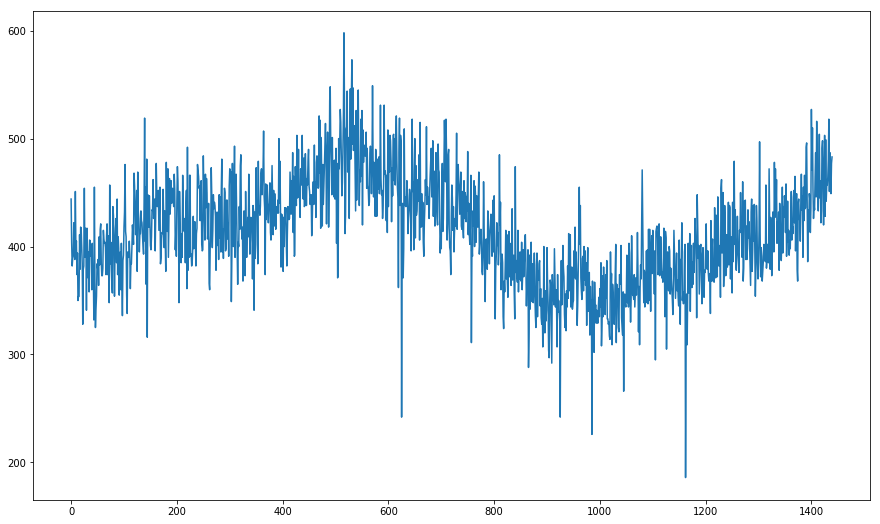

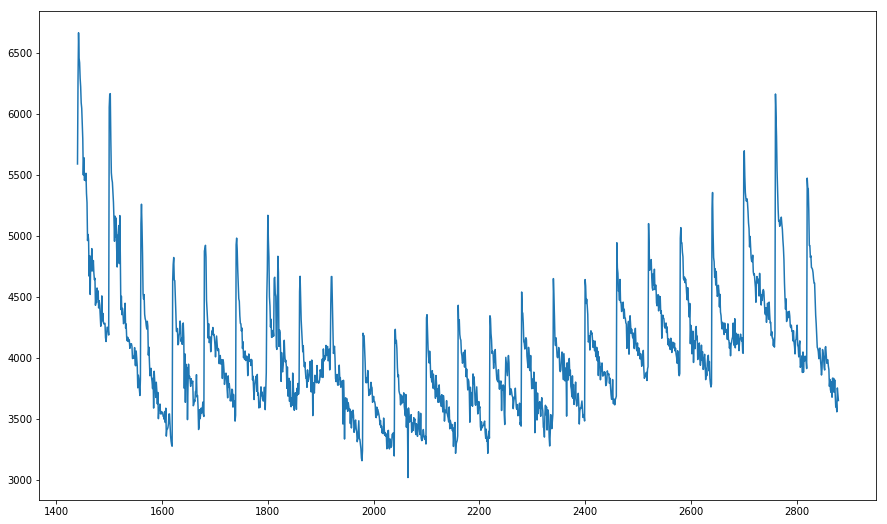

In [124]:
plt.figure(figsize = (15,9))
plt.plot(df_2.loc[df_2['app_type'] == 'clean app','requests'])
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/007_case_1.png')
plt.show()

plt.figure(figsize = (15,9))
plt.plot(df_2.loc[df_2['app_type'] == 'fraud app','requests'])
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/008_case_1.png')
plt.show()

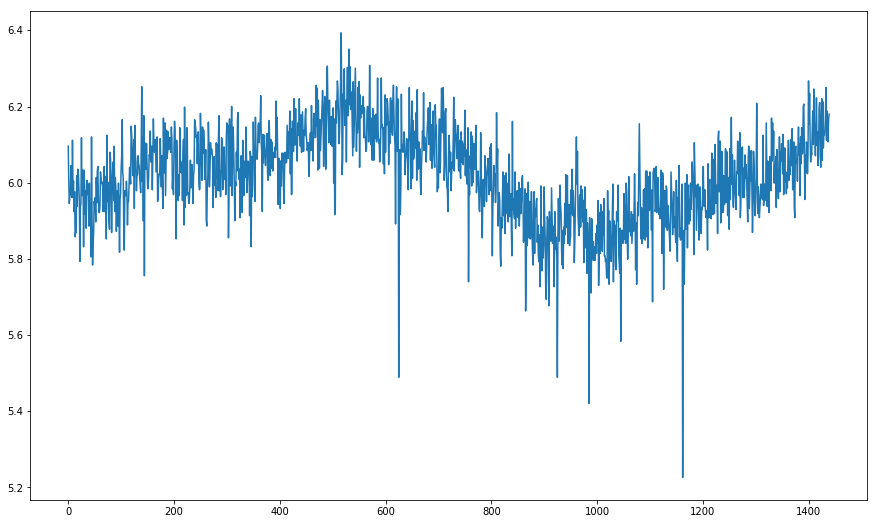

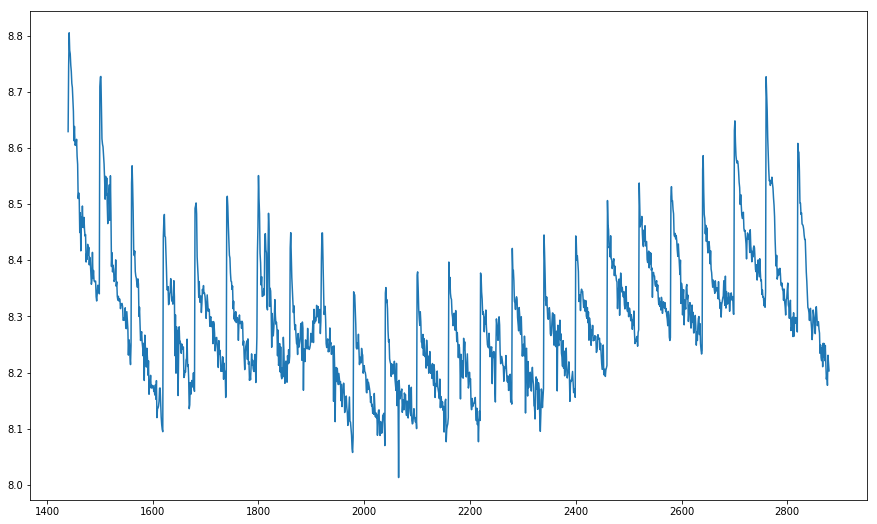

In [125]:
plt.figure(figsize = (15,9))
plt.plot(np.log(df_2.loc[df_2['app_type'] == 'clean app','requests']))
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/009_case_1.png')
plt.show()

plt.figure(figsize = (15,9))
plt.plot(np.log(df_2.loc[df_2['app_type'] == 'fraud app','requests']))
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/010_case_1.png')
plt.show()

In [98]:
# plt.figure(figsize = (15,9))
# ts = df_2.loc[df_2['app_type'] == 'clean app','requests']
# plt.plot(ts - lowess(ts, range(0,len(ts)), frac=0.1, return_sorted=False, is_sorted=True))
# # plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/009_1_case_3.png')
# plt.show()

# plt.figure(figsize = (15,9))
# ts = df_2.loc[df_2['app_type'] == 'fraud app','requests']
# plt.plot(ts - lowess(ts, range(0,len(ts)), frac=0.1, return_sorted=False, is_sorted=True))
# # plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/009_1_case_3.png')
# plt.show()

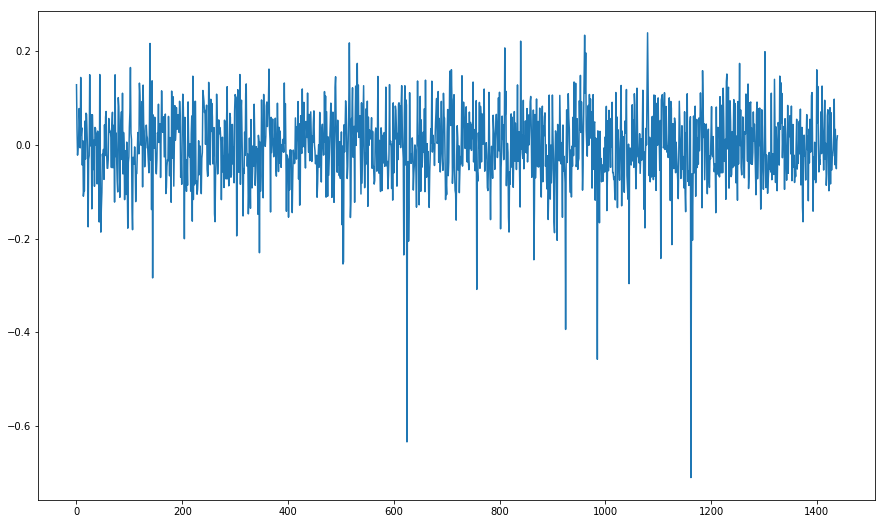

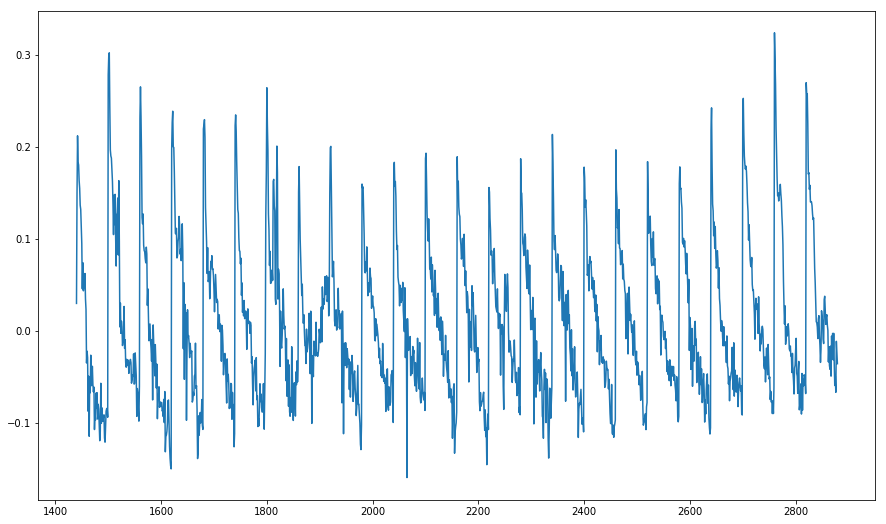

In [126]:
plt.figure(figsize = (15,9))
ts = np.log(df_2.loc[df_2['app_type'] == 'clean app','requests'])
plt.plot(ts - lowess(ts, range(0,len(ts)), frac=0.1, return_sorted=False, is_sorted=True))
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/011_case_1.png')
plt.show()

plt.figure(figsize = (15,9))
ts = np.log(df_2.loc[df_2['app_type'] == 'fraud app','requests'])
plt.plot(ts - lowess(ts, range(0,len(ts)), frac=0.1, return_sorted=False, is_sorted=True))
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/012_case_1.png')
plt.show()

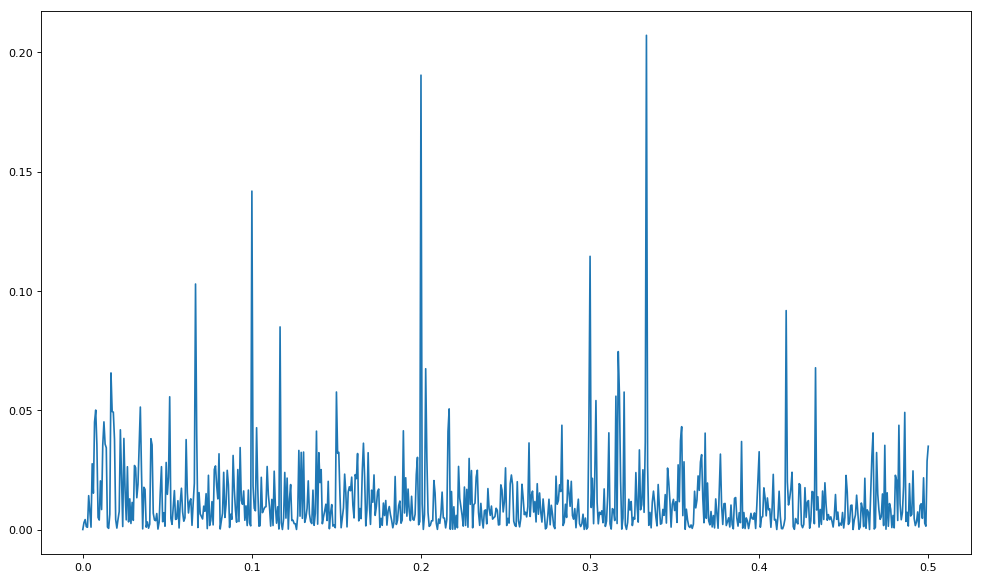

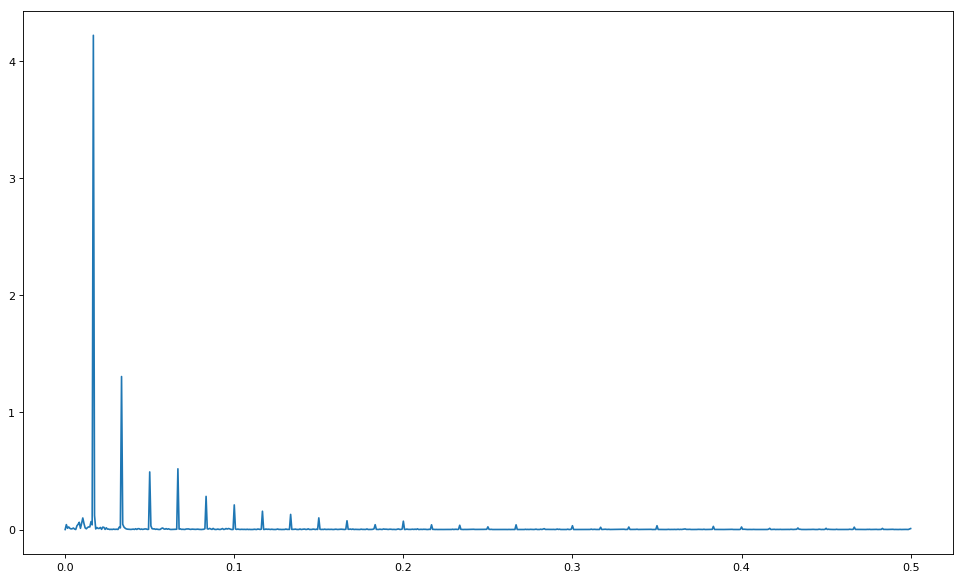

In [127]:
plt.figure(figsize=(15, 9), dpi=80)
ts = np.log(df_2.loc[df_2['app_type'] == 'clean app','requests'])
ts = ts - lowess(ts, range(0,len(ts)), frac=0.1, return_sorted=False, is_sorted=True)
f, Pxx_den = signal.periodogram(ts)
plt.plot(f, Pxx_den)
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/013_case_1.png')
plt.show()

plt.figure(figsize=(15, 9), dpi=80)
ts = np.log(df_2.loc[df_2['app_type'] == 'fraud app','requests'])
ts = ts - lowess(ts, range(0,len(ts)), frac=0.1, return_sorted=False, is_sorted=True)
f, Pxx_den = signal.periodogram(ts)
plt.plot(f, Pxx_den)
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/014_case_1.png')
plt.show()

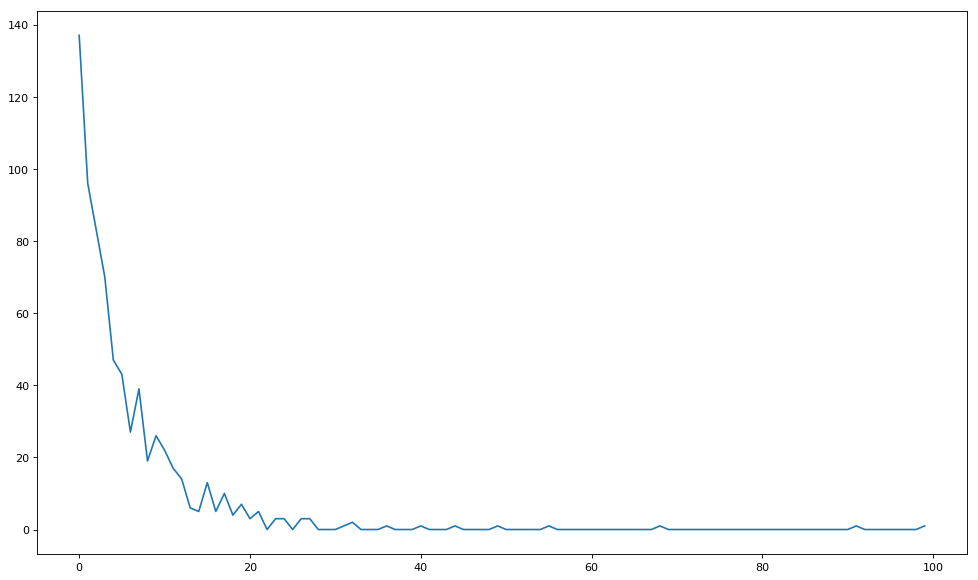

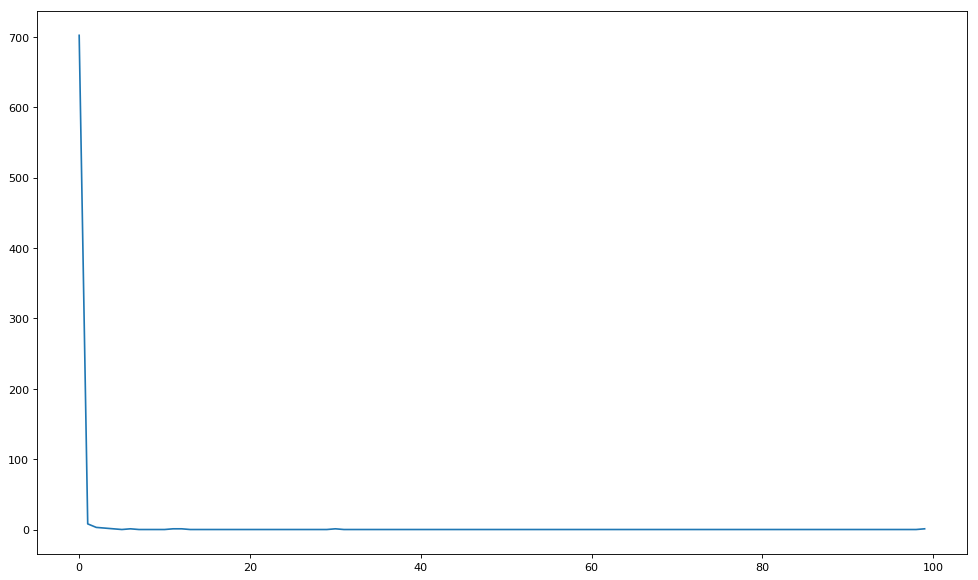

In [128]:
plt.figure(figsize=(15, 9), dpi=80)
ts = np.log(df_2.loc[df_2['app_type'] == 'clean app','requests'])
ts = ts - lowess(ts, range(0,len(ts)), frac=0.1, return_sorted=False, is_sorted=True)
f, ts = signal.periodogram(ts)
ts = (ts-min(ts))/(max(ts)-min(ts))
ts = np.histogram(ts, bins = 100, density=False)[0]
plt.plot(ts)
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/015_case_1.png')
plt.show()

plt.figure(figsize=(15, 9), dpi=80)
ts = np.log(df_2.loc[df_2['app_type'] == 'fraud app','requests'])
ts = ts - lowess(ts, range(0,len(ts)), frac=0.1, return_sorted=False, is_sorted=True)
f, ts = signal.periodogram(ts)
ts = (ts-min(ts))/(max(ts)-min(ts))
ts = np.histogram(ts, bins = 100, density=False)[0]
plt.plot(ts)
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/016_case_1.png')
plt.show()

In [111]:
mean = 0
std = 1 
# num_samples = 661*2-1
num_samples = 1000000
white_noise_sample = np.random.normal(mean, std, size=num_samples)
f, Pxx_den_noise = signal.periodogram(white_noise_sample)
normalized_noise = (Pxx_den_noise-min(Pxx_den_noise))/(max(Pxx_den_noise)-min(Pxx_den_noise))
normalized_counts = np.histogram(normalized_noise, bins = 100, density=False)[0]

In [116]:
ts = np.log(df_2.loc[df_2['app_type'] == 'clean app','requests'])
ts = ts - lowess(ts, range(0,len(ts)), frac=0.1, return_sorted=False, is_sorted=True)
f, ts = signal.periodogram(ts)
ts = (ts-min(ts))/(max(ts)-min(ts))
ts = np.histogram(ts, bins = 100, density=False)[0]
result_clean = entropy(pk = ts+0.0001, qk = normalized_counts+0.001)

ts = np.log(df_2.loc[df_2['app_type'] == 'fraud app','requests'])
ts = ts - lowess(ts, range(0,len(ts)), frac=0.1, return_sorted=False, is_sorted=True)
f, ts = signal.periodogram(ts)
ts = (ts-min(ts))/(max(ts)-min(ts))
ts = np.histogram(ts, bins = 100, density=False)[0]
result_fraud = entropy(pk = ts+0.0001, qk = normalized_counts+0.001)

print(result_clean, result_fraud)

0.08975031434253808 1.866830787400989


In [62]:
ts = [15861,15874,15892,15728,15952,16085,15859,16071,16153,15999,13490,16172,16242,16330,16234,16070,16135,16186,16061,16082,16210,15991,15261,16113,15032,16043,16058,16090,16082,16127,16047,16035,16046,16112,16163,16257,16022,16163,16211,16214,16351,16231,16251,16141,16230,16139,16063,16168,16065,16092,16201,16034,16268,16126,16175,16033,16226,16085,16168,16161,16055,16086,9514,4476,1004,8816,14831,9856,7631,7771,3552,13525,19309,12132,17339,16128,16213,16270,16280,16248,16222,16167,16200,16279,15879,16058,16183,16256,16086,16051,16226,16106,16162,16181,16253,16178,16265,16168,16149,16140,16180,16180,16122,16196,16185,16101,16108,16132,16122,16051,16197,16069,16047,16148,16132,16020,16183,16236,16095,16239,16150,16226,16122,16308,16158,16209,16166,16381,16332,16304,16304,16494,16283,16300,16283,16431,16348,16362,16363,16353,16373,16286,15626,16474,15334,16280,16318,16368,16327,16379,16480,16554,16551,16609,16554,16585,16435,16653,16550,16542,16534,16553,16507,16609,16553,16556,16547,16550,16548,16740,16563,16750,16688,16521,16496,16443,16465,16511,16485,16500,16562,16477,16370,16561,16534,16445,16560,16537,16617,16531,16558,16510,16554,16571,16483,16603,16645,16584,16621,16629,16705,16562,16427,16634,15669,16618,16574,16701,16622,16500,16643,15553,16573,16638,16769,16754,16784,16722,16683,16766,16633,16787,16432,16665,16625,16794,16736,16671,16705,16789,16770,16737,16844,16674,16908,16896,16770,16753,16863,16881,16853,16628,16681,16722,16841,16723,16818,16736,16787,16810,16939,16789,16851,16829,16965,16924,16973,16987,16875,17017,16832,16602,16899,16826,16871,16800,16986,16905,16140,16925,16831,16642,16891,16825,16882,16781,16942,16929,16924,17070,16867,16793,16937,16826,16871,16867,16855,16981,16864,16949,16920,16946,16867,16812,16947,16966,16890,16839,16884,16894,17013,16742,17053,17011,16991,17088,16950,17039,16936,17062,17125,17191,16929,16942,17007,17140,16991,16977,17061,16592,17155,16919,16494,17101,17220,17120,17267,17244,17013,17131,17291,17107,17224,17214,17248,17186,17120,17182,17240,17291,17359,17134,17206,17379,17379,17097,17218,17228,17103,16415,10917,9978,9461,10064,9793,9719,9812,9697,9871,10318,9583,10070,9737,9729,10488,9901,9771,9564,9466,10370,9246,9329,9614,9411,10333,9643,9369,9729,9873,10721,9667,9044,13474,17466,17033,16474,17665,17704,17529,17460,16460,10391,10277,10572,10406,10394,10230,10441,10496,10390,10623,10448,10423,10704,10783,10440,10527,11263,12334,12443,12462,12569,12535,12574,12221,12392,12712,12486,12560,12578,12614,12148,12428,12652,12535,12447,12253,12387,12253,12555,12636,12484,12686,12660,12616,12652,12894,12472,12540,12361,13010,12410,12739,12307,12172,12266,12566,12692,12814,12484,12734,12211,12791,12953,12873,12636,12296,12805,12747,12747,12851,12493,12704,12578,12319,12452,12722,12512,12696,12650,12633,12458,12575,12282,12606,12537,12733,12660,12635,12581,13409,12374,12771,12536,12658,12863,12784,12855,12684,12730,12870,12569,12688,12759,12573,12226,12657,12167,12491,12057,12508,13044,12712,12581,12750,11691,12885,12640,12620,11975,11471,11936,11782,11845,11773,12017,12386,12544,12470,12115,12278,12773,12171,12100,12356,12170,12106,12444,12192,12145,11908,11905,12278,12546,12142,11944,11970,12087,11919,11868,12400,11866,11968,11975,12079,11686,12232,12112,11817,11835,11879,11764,11945,11513,11863,11984,12121,11785,11861,11682,11881,11803,11272,11920,11769,11722,11911,11981,11660,11597,11827,11942,11871,11765,12007,11841,11944,11501,11696,11869,11878,11598,11763,11557,11796,11574,11812,11698,11645,11569,11532,11445,11526,11395,11671,11428,11452,11686,11282,11351,11725,11643,11462,11473,11361,11368,11493,11549,11457,11628,11619,11628,11519,11529,11316,11481,11502,11340,11304,11546,11165,11018,11184,11320,11265,10828,11266,11041,11191,11333,11297,11121,11236,11040,11185,11132,11093,11247,11093,11195,11150,11092,11185,11137,11308,11150,11134,11298,11028,11195,11054,11029,11015,11216,11058,11063,10851,10959,11266,11115,11230,11010,10964,11078,10999,11034,10855,10842,10935,11009,11114,11099,10983,10999,10906,10867,10893,10922,10936,10902,10889,10693,10895,10835,10721,10478,10814,10781,10921,10827,10977,10807,10885,10830,10781,10793,10800,10728,10688,10747,10697,10837,10924,11044,11045,10958,10904,10817,11124,10914,11095,11145,10973,11081,10892,10894,11028,10778,10607,10986,10935,10899,10758,10977,10769,10855,10789,10693,11096,10848,11081,10905,10995,10817,11137,10855,10893,10712,10820,10861,10969,10355,10982,10945,10315,10367,10729,10794,10835,10729,10755,10850,10818,10825,10749,10896,10670,10972,10828,10803,10945,10769,10725,10913,10838,10778,10736,10619,10735,10648,10604,10472,10561,10574,10474,10563,10539,10450,10514,10522,10662,10442,10533,10618,10553,10445,10582,10444,10572,10529,10385,10456,10508,10646,10533,10312,10451,10431,10479,10259,10534,10438,10591,10466,10616,10469,10414,10562,10508,10182,10254,10175,10312,10486,10374,10393,10488,10386,10359,10520,10455,10424,10324,10443,10472,10395,10363,10234,10367,10334,10435,10402,10437,10387,10410,10425,10302,10320,10368,10574,10760,10478,10652,10551,10590,10685,10530,10665,10622,10572,10751,10545,10485,10615,10631,10427,10545,10649,10627,10769,10545,10540,10297,10548,10607,10481,10499,10708,10673,10608,10694,10723,10683,10593,10386,10656,10505,10687,10469,10570,10543,10589,10541,10699,10595,10520,10523,10553,10629,10502,10642,10499,10648,10639,10558,10577,10477,10737,10583,10552,10882,10438,10586,10524,10667,10632,10553,10569,10533,10614,10776,10609,10593,10656,10621,10695,10556,10728,10528,10683,10728,10575,10451,10744,10692,10539,10331,10600,10622,10630,10676,10579,10821,10660,10556,10542,10579,10598,10625,10490,10481,10504,10490,10523,10507,10479,10274,10672,10454,10465,10582,10389,10539,10542,10654,10453,10430,10625,10438,10438,10602,10232,10415,10440,10395,10429,10430,10356,10398,10452,10387,10526,10470,10526,10405,10437,10391,10546,10468,10387,10345,10206,10365,10372,10431,10480,10375,10460,10546,10447,10462,10498,10403,10562,10450,10592,10349,10414,10429,10348,10468,10527,10500,10451,10282,10484,10361,10455,10246,10455,10517,10424,10205,10290,10240,10353,10220,10288,10236,10146,10274,9895,10035,10242,10143,10170,10186,10001,10072,10211,10147,9866,10092,10150,10035,10035,10057,10117,10091,10103,10172,10148,10029,10051,10119,10014,10302,10235,10179,10223,10418,10343,10168,10285,10271,10171,10188,10113,10210,10226,10234,10222,10373,10337,10310,10271,10184,10207,10249,10252,10266,10258,10216,10239,10274,10301,10185,10195,10249,10214,10260,10079,10047,10087,10370,10230,10216,10257,10228,10309,10313,10259,10176,10344,10214,10287,10302,10320,10175,10203,10305,10336,9781,10363,10167,10122,10293,10275,10266,10318,10136,10236,10270,10156,10290,10467,10265,10184,10154,10356,10502,10299,10196,10310,10339,10170,10317,10114,10342,10285,10165,10189,10215,10099,10233,10137,10014,10143,10186,10112,10196,10145,9962,10035,10222,10041,10021,10034,10205,10072,10149,9884,9966,10020,10091,10007,9941,9961,10057,9700,9946,10022,9505,10278,10123,9904,9945,10162,9959,10058,10074,9820,9751,9914,10069,9890,9885,9985,9917,9932,9957,9826,9925,9911,9863,9805,9764,9795,9820,9831,9901,9782,9920,9830,9788,9872,9935,9857,9853,9860,9915,9643,9572,9707,9460,9636,9536,9594,9619,9644,9643,9614,9666,9729,9758,9655,9706,9594,9674,9636,9634,9532,9432,9639,9573,9709,9644,9477,9441,9469,9509,9447,9448,9564,9616,9537,9464,9438,9476,9397,9408,9516,9591,9506,9534,9370,9374,9433,9351,9411,9511,9417,9275,9518,9363,9365,9446,9499,9334,9346,9496,9315,9241,9309,9340,9320,9334,9277,9281,9158,9346,9271,9284,9177,9362,9230,9214,9224,9283,8945,9208,9208,9098,9233,9137,9208,9280,9371,9179,9321,9265,9205,9159,9270,9257,9227,9237,9249,9170,9115,9247,9201,9220,9233,9208,9226,9200,9222,9148,9228,9198,9131,9164,9161,9032,9069,9149,9148,9100,9146,9089,9137,9027,9037,9107,9103,9030,9241,9084,9191,9179,9140,9204,9076,9139,9079,9134,9143,9131,9081,9128,8932,8910,8933,8884,9076,8995,9094,9163,9111,9057,9133,9024,9207,9148,9136,9045,9075,9112,9032,9118,9096,9078,9135,9090,9090,9062,9017,9015,9091,9064,9165,9090,9042,9052,9062,9071,9098,9060,9036,9163,9051,8999,9143,9246,9106,9107,9128,9253,9277,9189,9036,9042,9131,9193,9117,9042,9232,9138,9181,9226,9137,9117,9042,8779,9176,9212,9208,9164,9147,9082,9207,9102,9191,9209,9146,9176,9209,9150,9184,9167,9034,9146,9110,9163,9108,9105,9160,9124,9114,9202,9153,9193,9261,9157,9201,9129,9279,9155,9208]
ts = np.array(ts)

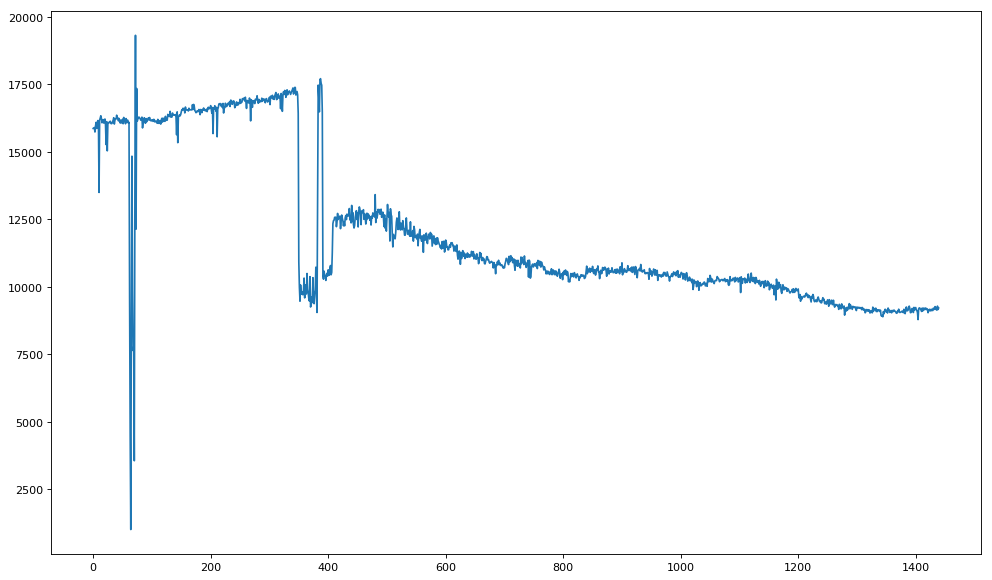

In [63]:
plt.figure(figsize=(15, 9), dpi=80)
plt.plot(ts)
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/027_case_1.png')
plt.show()

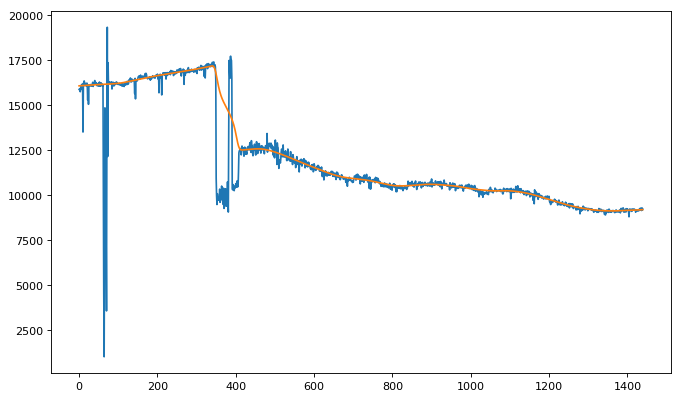

In [64]:
ts_trend = lowess(ts, range(0,len(ts)), frac=0.1, return_sorted=False, is_sorted=True)
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(ts)
plt.plot(ts_trend)
plt.show()

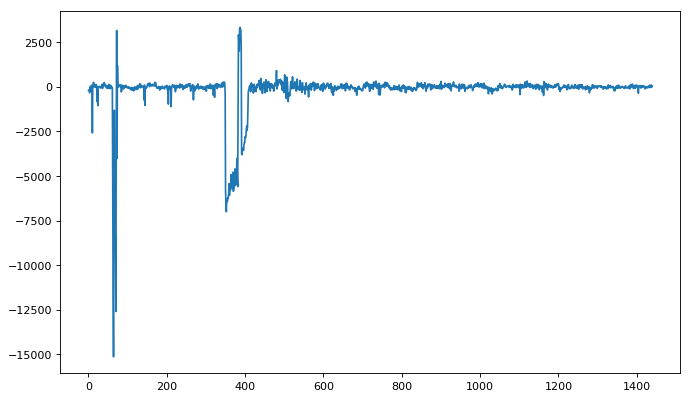

In [65]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(ts - ts_trend)
plt.show()

In [36]:
def trajectory_matrix(vector, L):
    K = len(vector)-L+1
    for k in range(K):
        if k == 0:
            tr_m = vector[k:k+L].reshape(L,1)
        else:
            tr_m = np.hstack((tr_m,vector[k:k+L].reshape(L,1)))
    return(tr_m)



def plot_cp_results(ts_list):
    for i,j in enumerate(ts_list):
        if i%2 == 0:
            col = 'blue'
        else:
            col = 'red'
        if i == 0:            
            current_ts = j
            current_len = len(j)
            plt.plot(range(current_len),current_ts, color=col)
            all_len = 0
        else:            
            all_len += current_len
            current_ts = j
            current_len = len(current_ts)
            plt.plot(range(all_len,all_len+current_len),current_ts, color=col)
    plt.show()

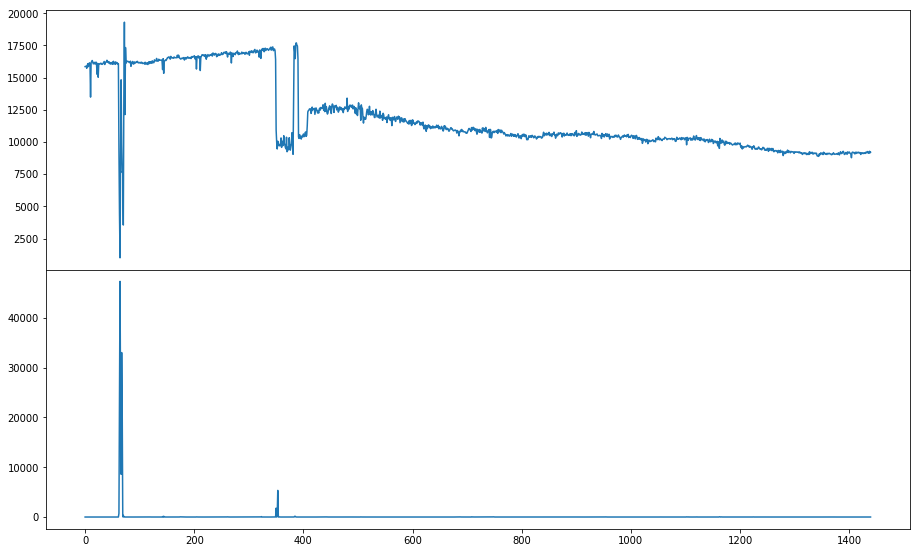

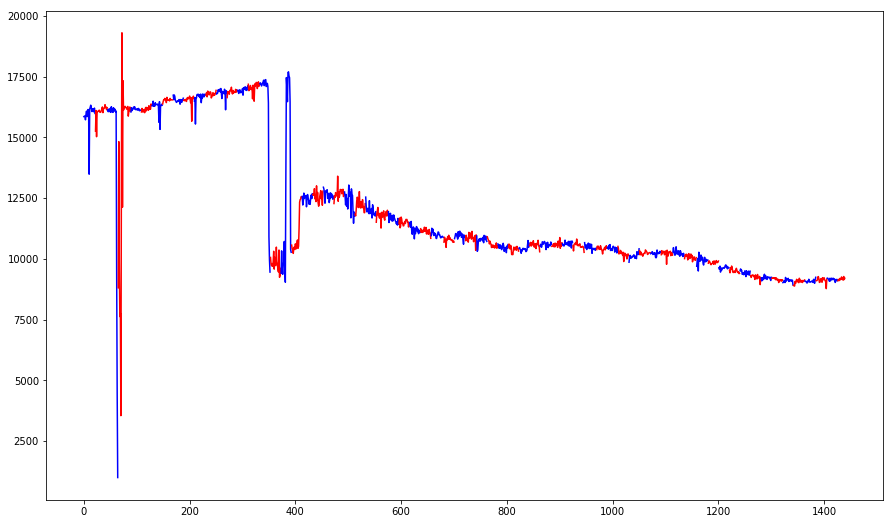

In [100]:
L, I, N, p = [5, 4, 15,16]
dist_list = [0]*(N+L)

for j in range(len(ts)-N-L):
    dist_list.append(subspace_distance(vector=ts, L=L, I=I, n=j, N=j+N, p=p, q=p+L))
    
fig = plt.figure(figsize = (15,9))
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[])
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4])
x = np.linspace(0, 10)
ax1.plot(ts)
ax2.plot(dist_list)
# plt.title('SSA')
plt.show()


ts_splitted = split_ts(time_series=ts, L=L, I=I, N=N, p=p, q=p+L, threshold=0.1)
plt.figure(figsize = (15,9))
plot_cp_results(ts_splitted)

### SSA

In [57]:
def trajectory_matrix(vector, L):
    K = len(vector)-L+1
    for k in range(K):
        if k == 0:
            tr_m = vector[k:k+L].values.reshape(L,1)
        else:
            tr_m = np.hstack((tr_m,vector[k:k+L].values.reshape(L,1)))
    return(tr_m)

def svd(vector, L, I):
    traj_matrix = trajectory_matrix(vector,L)
    cov_matrix = np.dot(traj_matrix, traj_matrix.T)
    U_ = np.linalg.svd(cov_matrix)[0][:,0:I]
    return(U_)

def my_ssa(vector, L, I):
    traj_matrix = trajectory_matrix(vector,L)
    svd_ = np.linalg.svd(traj_matrix, full_matrices=False)
    traj_matrix_rec = svd_[0][:,0:I] @ np.diag(svd_[1][0:I]) @ svd_[2][0:I,:]
    
    traj_matrix_rec_2 = traj_matrix_rec.copy()
    for i,j in enumerate(range(traj_matrix_rec.shape[1]-1,-1,-1)):
        traj_matrix_rec_2[:,i] = traj_matrix_rec[:,j]
        
    vector_reconstructed = []
    for i in range(traj_matrix_rec_2.shape[1]-1,-1,-1):
        vector_reconstructed.append(np.mean(traj_matrix_rec_2.diagonal(offset=i)))

    for i in range(1,traj_matrix_rec_2.shape[0]):
        vector_reconstructed.append(np.mean(traj_matrix_rec_2.diagonal(offset=-i)))
    
    return(vector_reconstructed)

def subspace_distance(vector, L, I, n, N, p, q):
    base_vector = vector[n:N]
    test_vector = vector[n+p:n+q]
    U = svd(base_vector,L,I)
    test_traj_matrix = trajectory_matrix(test_vector,L)
    distance = []
    subspace = U @ U.T
    
    for i in test_traj_matrix.T:
        test_x = np.array([i]).T
        distance.append((test_x.T @ test_x)[0][0] - (test_x.T @ subspace @ test_x)[0][0])
    variance_ = np.var(base_vector - my_ssa(base_vector, L, I))
    return((sum(distance)/(L*(q-p)))/variance_)
#     return(variance_)
#     return(sum(distance)/(L*(q-p)))
#     return(sum(distance))


def change_point_detection(time_series, L, I, N, p, q, threshold, iteration):
    if len(time_series) < N+L+1:
        return([time_series])
    cp_score = []
    for j in range(len(time_series)-N-L):
        cp_score.append(subspace_distance(vector=time_series, L=L, I=I, n=j, N=j+N, p=p, q=q))
    max_score = max(cp_score)
    if max_score >= threshold:
        change_point = [i for i, j in enumerate(cp_score) if j >= threshold][0] + N + L
#         if iteration%2 == 0:
#             change_point = [i for i, j in enumerate(cp_score) if j >= threshold][0] + N + L
#         else:
#             change_point = [i for i, j in enumerate(cp_score) if j >= threshold][::-1][0] - N - L
        time_series_splitted = [time_series[:change_point],time_series[change_point:]]
        return(time_series_splitted)
    else:
        return([time_series])
    

def split_ts(time_series, L, I, N, p, q, threshold):
    counter = 0
    iteration = 0
    while True:
        if counter == 0:
            counter += 1
            temp_ts = time_series
            ts_splitted = change_point_detection(temp_ts, L, I, N, p, q, threshold, iteration)
            if len(ts_splitted) == 1:
                break
            iteration = 1
        else:
            ts_splitted_temp = []
            for part, temp_ts in enumerate(ts_splitted):
                ts_splitted[part] = change_point_detection(temp_ts, L, I, N, p, q, threshold, iteration)
                for i in ts_splitted[part]:
                    ts_splitted_temp.append(i)
                iteration += 1
            ts_splitted = ts_splitted_temp
            
            if counter == 1:
                len_ts_splitted = 0
                counter += 1
            if len_ts_splitted == len(ts_splitted):
                break
            else:
                len_ts_splitted = len(ts_splitted)
        iteration += 1
    return(ts_splitted)

In [58]:
def unlist_ts(ts_list):
    final_ts = []
    if isinstance(ts_list,np.ndarray):
        final_ts.append(ts_list)
    elif isinstance(ts_list,list):
        for i in ts_list:
            final_ts += unlist_ts(i)
    return(final_ts)

def plot_cp_results(ts_list, image_path):
    for i,j in enumerate(ts_list):
        if i%2 == 0:
            col = 'blue'
        else:
            col = 'red'
        if i == 0:            
            current_ts = j
            current_len = len(j)
            plt.plot(range(current_len),current_ts, color=col)
            all_len = 0
        else:            
            all_len += current_len
            current_ts = j
            current_len = len(current_ts)
            plt.plot(range(all_len,all_len+current_len),current_ts, color=col)
    plt.savefig(image_path)
    plt.show()

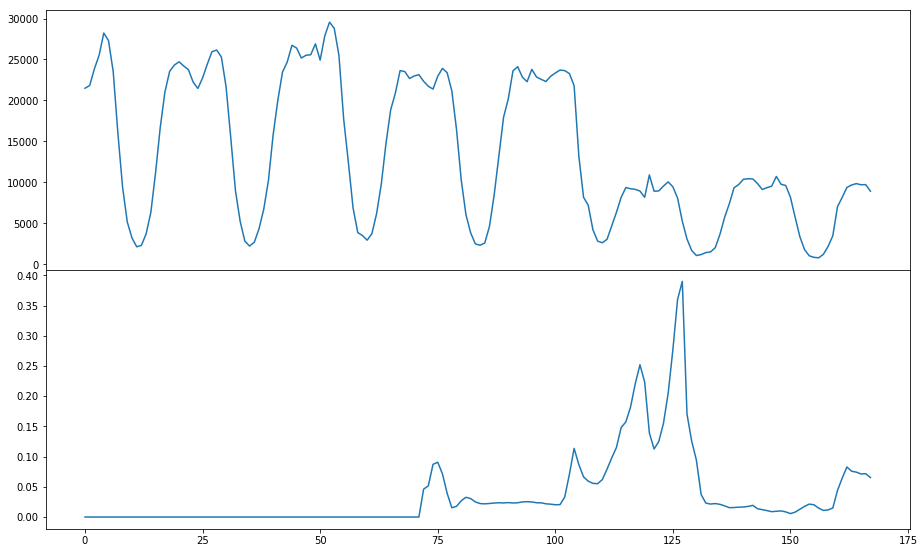

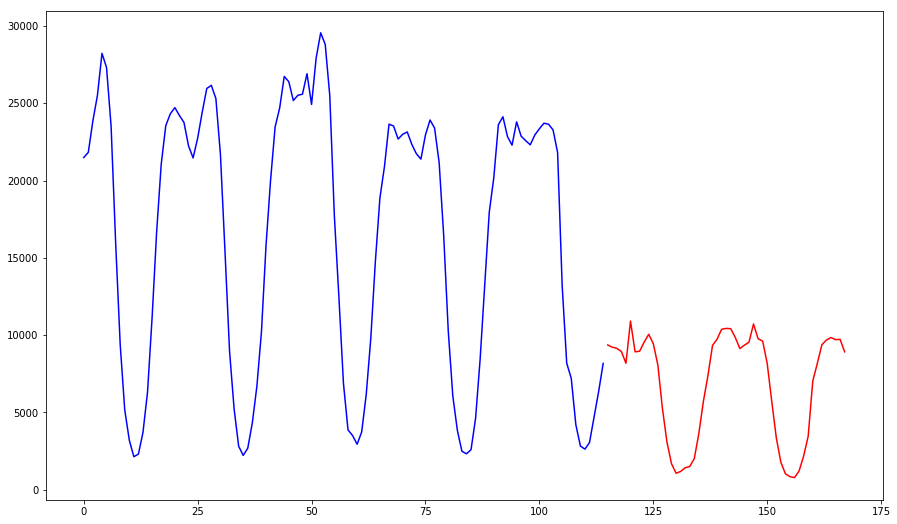

In [20]:
ts = df_1.loc[df_1['change_point_type'] == 'mean', 'impressions'].reset_index()['impressions']
L, I, N, p = [24,5,48,49]
dist_list = [0]*(N+L)

for j in range(len(ts)-N-L):
    dist_list.append(subspace_distance(vector=ts, L=L, I=I, n=j, N=j+N, p=p, q=p+L))
    
fig = plt.figure(figsize = (15,9))
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[])
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4])
x = np.linspace(0, 10)
ax1.plot(ts)
ax2.plot(dist_list)
# plt.title('SSA')
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/017_mean_cp.png')
plt.show()


ts_splitted = split_ts(time_series=ts, L=L, I=I, N=N, p=p, q=p+L, threshold=0.15)
plt.figure(figsize = (15,9))
plot_cp_results(ts_splitted,'/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/018_mean_cp_detected.png')

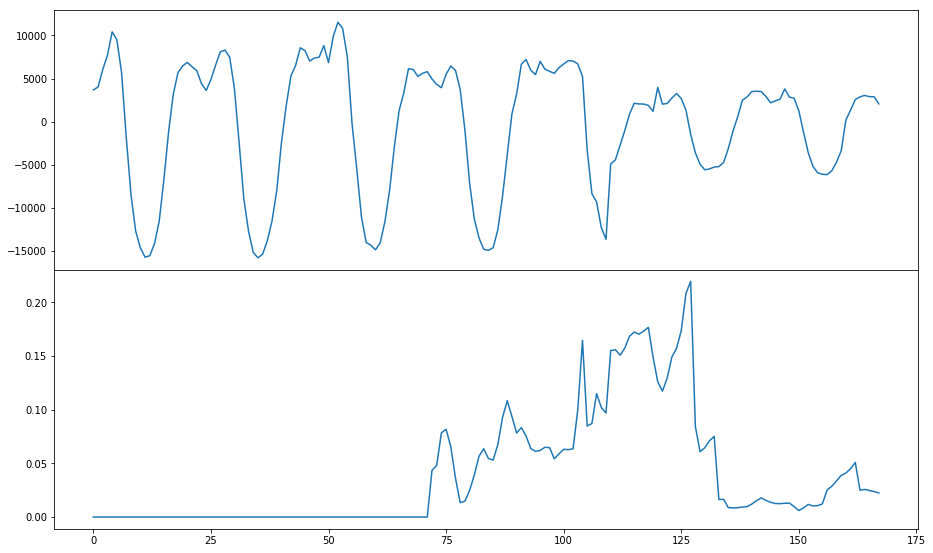

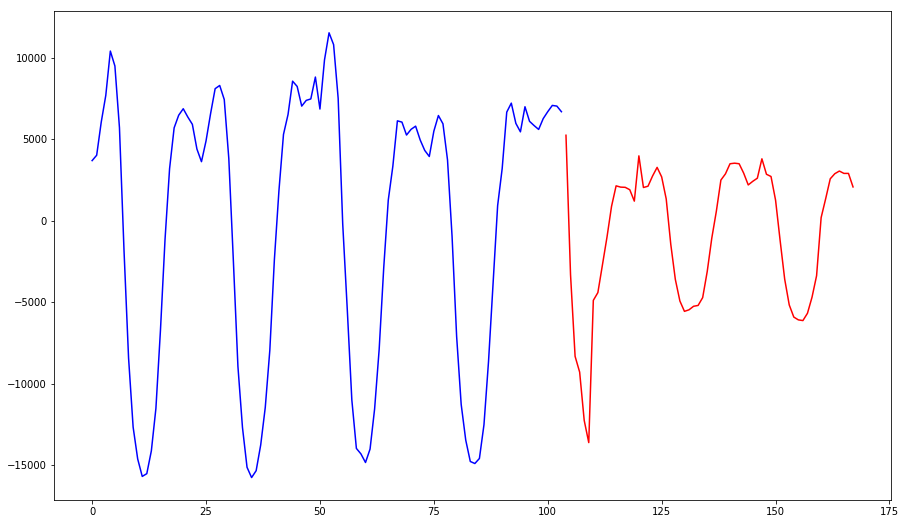

In [54]:
ts = df_1.loc[df_1['change_point_type'] == 'mean', 'impressions'].reset_index()['impressions']
ts = ts - np.hstack(
            (lowess(ts[0:110], range(0,len(ts[0:110])), frac=0.7, return_sorted=False, is_sorted=True),
             lowess(ts[110:], range(0,len(ts[110:])), frac=0.7, return_sorted=False, is_sorted=True)))

L, I, N, p = [24,5,48,49]
dist_list = [0]*(N+L)

for j in range(len(ts)-N-L):
    dist_list.append(subspace_distance(vector=ts, L=L, I=I, n=j, N=j+N, p=p, q=p+L))
    
fig = plt.figure(figsize = (15,9))
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[])
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4])
x = np.linspace(0, 10)
ax1.plot(ts)
ax2.plot(dist_list)
# plt.title('SSA')
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/019_variance_cp.png')
plt.show()


ts_splitted = split_ts(time_series=ts, L=L, I=I, N=N, p=p, q=p+L, threshold=0.15)
plt.figure(figsize = (15,9))
plot_cp_results(ts_splitted,'/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/020_variance_cp_detected.png')

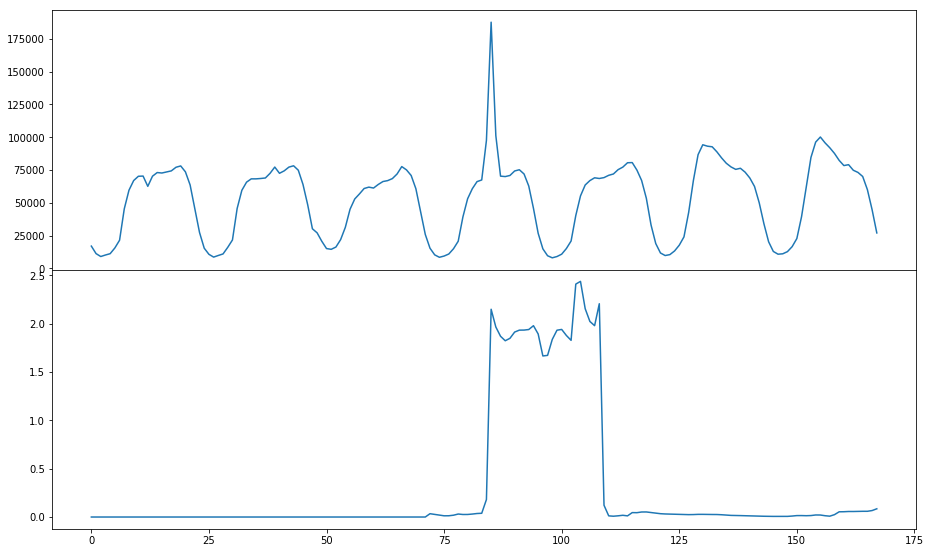

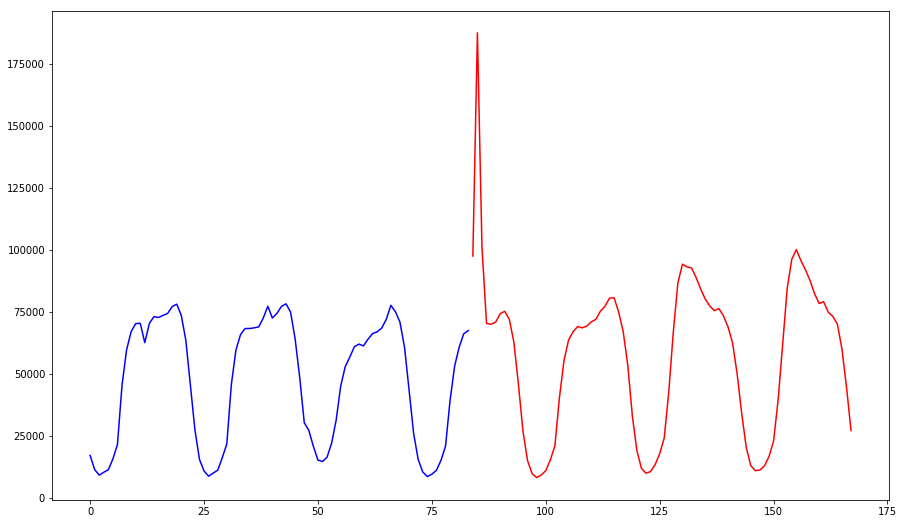

In [59]:
ts = df_1.loc[df_1['change_point_type'] == 'point', 'impressions'].reset_index()['impressions']

L, I, N, p = [24,5,48,49]
dist_list = [0]*(N+L)

for j in range(len(ts)-N-L):
    dist_list.append(subspace_distance(vector=ts, L=L, I=I, n=j, N=j+N, p=p, q=p+L))
    
fig = plt.figure(figsize = (15,9))
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[])
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4])
x = np.linspace(0, 10)
ax1.plot(ts)
ax2.plot(dist_list)
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/021_point_cp.png')
# plt.title('SSA')
plt.show()


ts_splitted = split_ts(time_series=ts, L=L, I=I, N=N, p=p, q=p+L, threshold=0.15)
plt.figure(figsize = (15,9))
plot_cp_results(ts_splitted
                ,'/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/022_point_cp_detected.png'
               )

In [60]:
def change_point_detection(time_series, L, I, N, p, q, threshold, iteration):
    if len(time_series) < N+L+1:
        return([time_series])
    cp_score = []
    time_seris = np.array(time_series)
    if iteration%2 != 0:
        time_series = time_series[::-1]
    for j in range(len(time_series)-N-L):
        cp_score.append(subspace_distance(vector=time_series, L=L, I=I, n=j, N=j+N, p=p, q=q))
    max_score = max(cp_score)
    if max_score >= threshold:
        change_point = [i for i, j in enumerate(cp_score) if j >= threshold][0] + N + L
        if iteration%2 != 0:
            time_series = time_series[::-1]
            change_point = len(time_series) - change_point
        time_series_splitted = [time_series[:change_point],time_series[change_point:]]
        return(time_series_splitted)
    else:
        return([time_series])

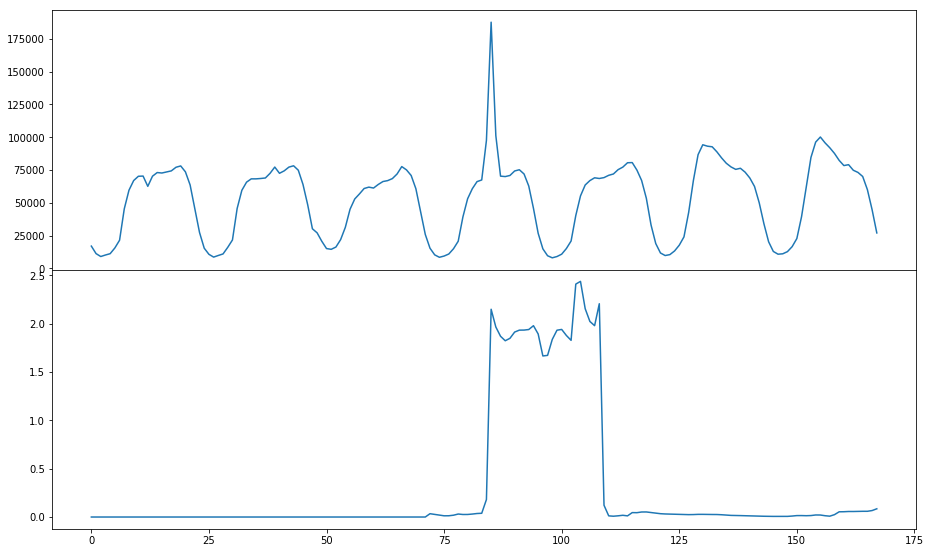

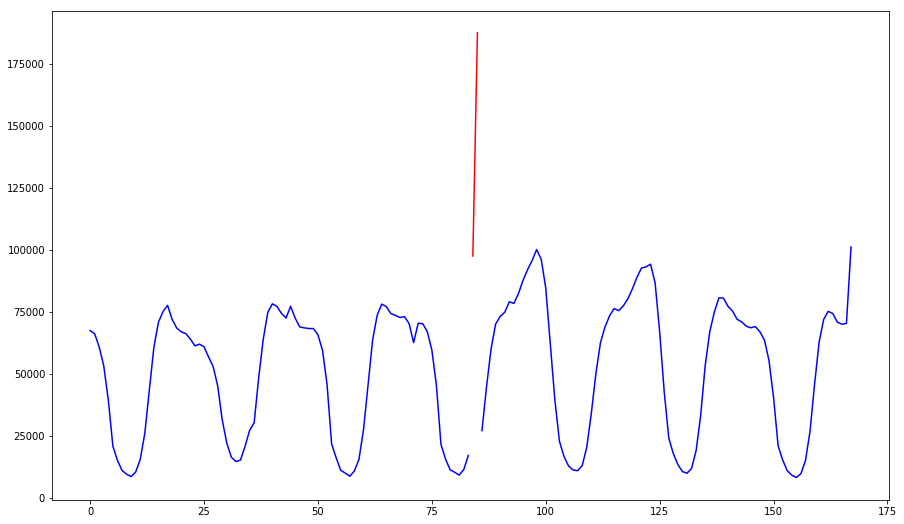

In [61]:
ts = df_1.loc[df_1['change_point_type'] == 'point', 'impressions'].reset_index()['impressions']

L, I, N, p = [24,5,48,49]
dist_list = [0]*(N+L)

for j in range(len(ts)-N-L):
    dist_list.append(subspace_distance(vector=ts, L=L, I=I, n=j, N=j+N, p=p, q=p+L))
    
fig = plt.figure(figsize = (15,9))
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[])
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4])
x = np.linspace(0, 10)
ax1.plot(ts)
ax2.plot(dist_list)
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/023_point_cp_2.png')
# plt.title('SSA')
plt.show()


ts_splitted = split_ts(time_series=ts, L=L, I=I, N=N, p=p, q=p+L, threshold=0.15)
plt.figure(figsize = (15,9))
plot_cp_results(ts_splitted,'/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/024_point_cp_detected_2.png')

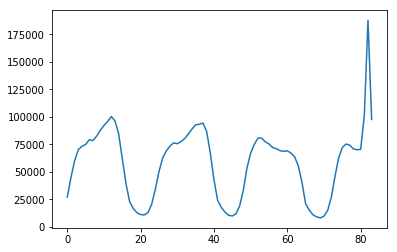

In [33]:
plt.plot(ts_splitted[1].values[::-1])

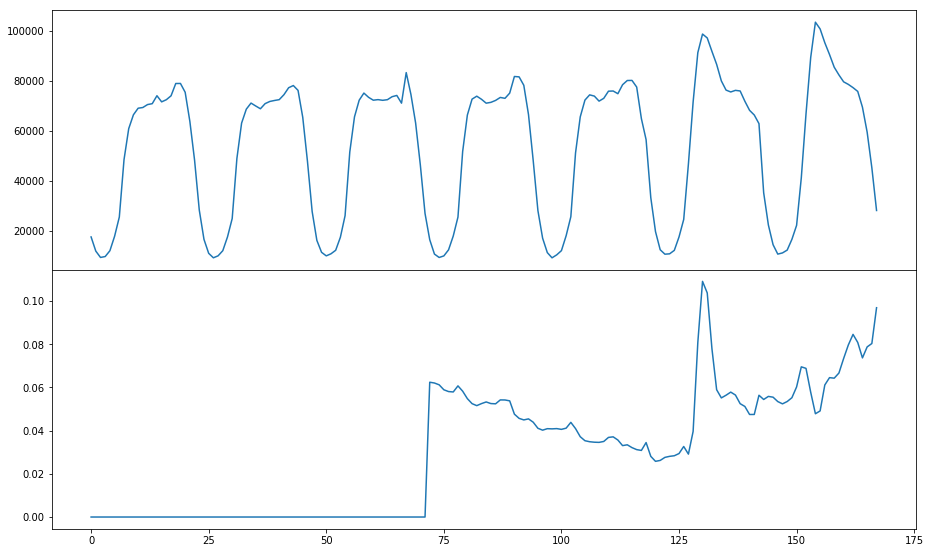

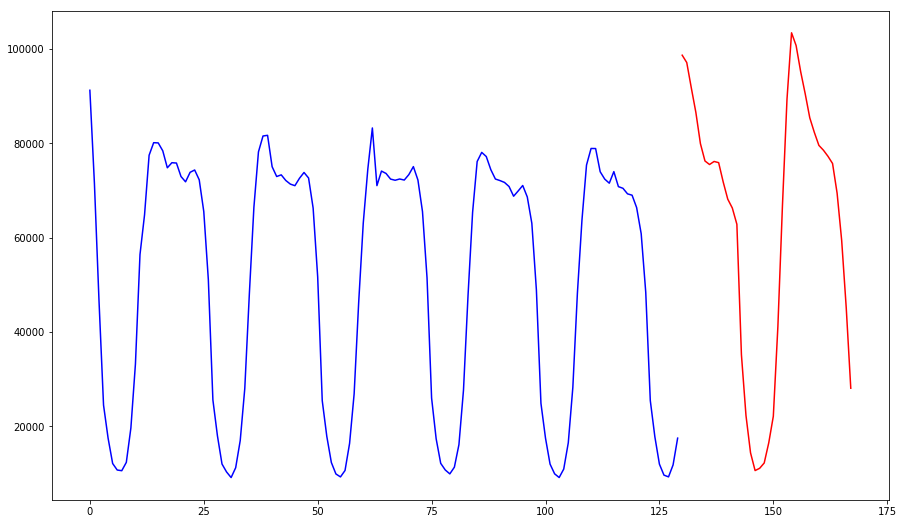

In [63]:
ts = df_1.loc[df_1['change_point_type'] == 'period', 'impressions'].reset_index()['impressions']


L, I, N, p = [24,5,48,49]
dist_list = [0]*(N+L)

for j in range(len(ts)-N-L):
    dist_list.append(subspace_distance(vector=ts, L=L, I=I, n=j, N=j+N, p=p, q=p+L))
    
fig = plt.figure(figsize = (15,9))
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[])
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4])
x = np.linspace(0, 10)
ax1.plot(ts)
ax2.plot(dist_list)
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/025_period_cp.png')
# plt.title('SSA')
plt.show()


ts_splitted = split_ts(time_series=ts, L=L, I=I, N=N, p=p, q=p+L, threshold=0.1)
plt.figure(figsize = (15,9))
plot_cp_results(ts_splitted,'/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/026_period_cp_detected.png')

# Tagged time series

In [76]:
df = pd.read_csv('/Users/klimmy/Klim/Statmod/SSA/dec_mar_5c_country_split_5_2.csv', sep = ';')

df_a = df.loc[df['country'] == 'country_a',:].copy()
df_b = df.loc[df['country'] == 'country_b',:].copy()
df_c = df.loc[df['country'] == 'country_c',:].copy()
df_d = df.loc[df['country'] == 'country_d',:].copy()
df_e = df.loc[df['country'] == 'country_e',:].copy()

df_a['counter'] = range(1,df_a.shape[0]+1)
df_b['counter'] = range(1,df_b.shape[0]+1)
df_c['counter'] = range(1,df_c.shape[0]+1)
df_d['counter'] = range(1,df_d.shape[0]+1)
df_e['counter'] = range(1,df_e.shape[0]+1)

bkps_a = list(df_a.loc[df_a['changepoint'] == 1,'counter'])
bkps_b = list(df_b.loc[df_b['changepoint'] == 1,'counter'])
bkps_c = list(df_c.loc[df_c['changepoint'] == 1,'counter'])
bkps_d = list(df_d.loc[df_d['changepoint'] == 1,'counter'])
bkps_e = list(df_e.loc[df_e['changepoint'] == 1,'counter'])

bkps_a.append(df_a.shape[0])
bkps_b.append(df_b.shape[0])
bkps_c.append(df_c.shape[0])
bkps_d.append(df_d.shape[0])
bkps_e.append(df_e.shape[0])

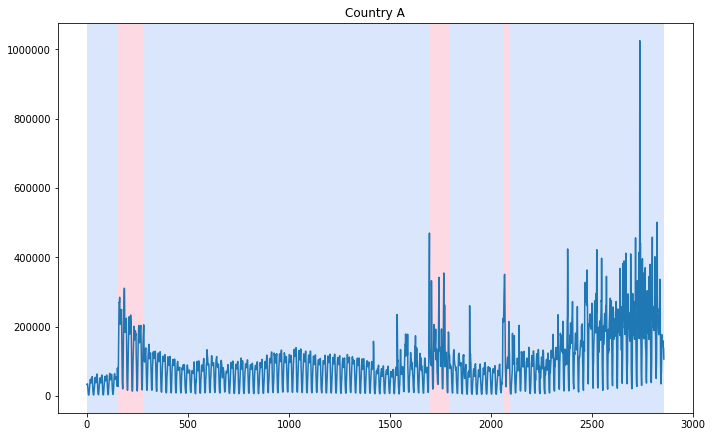

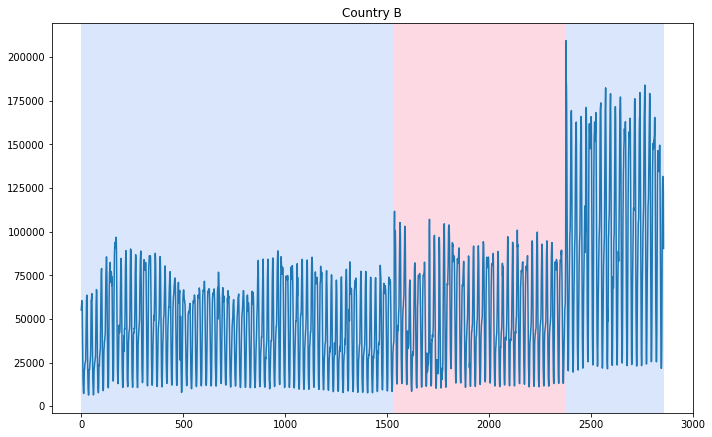

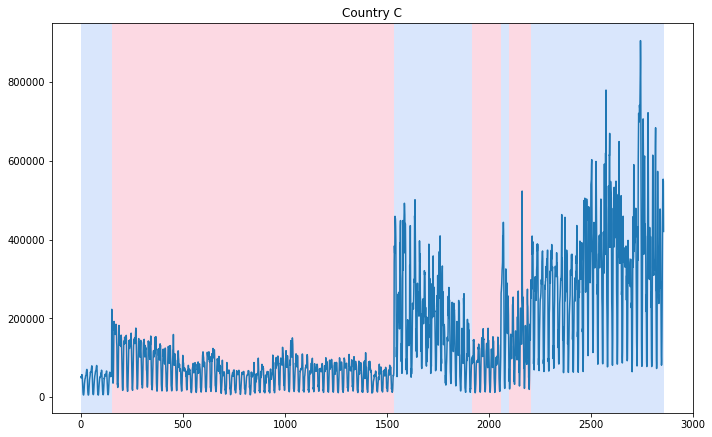

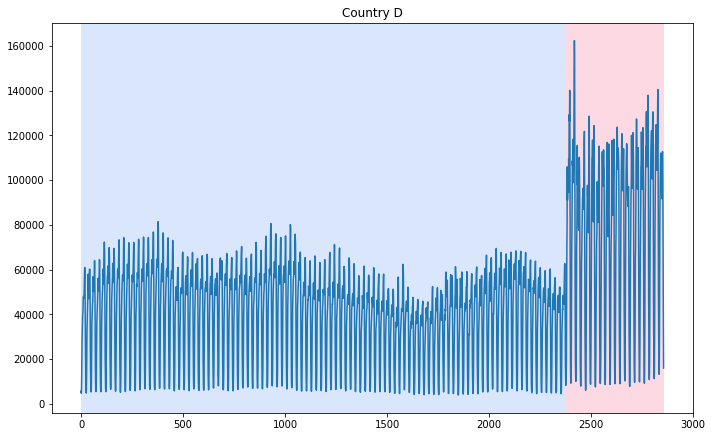

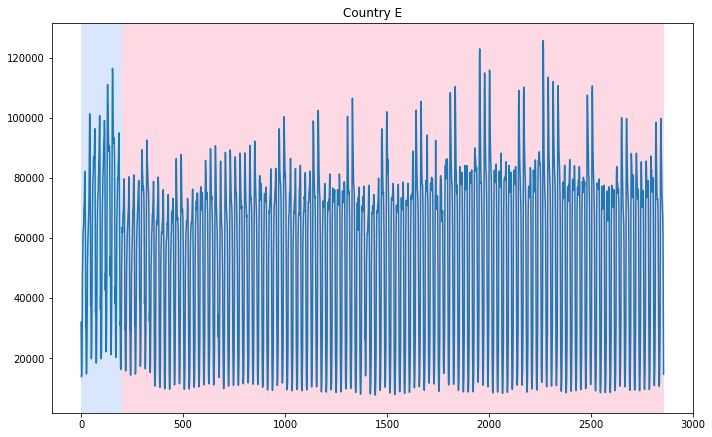

In [77]:
rpt.show.display(np.array(df_a['imp']), bkps_a, figsize=(10, 6))
plt.title('Country A')
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/028_country_a.png')
plt.show()

rpt.show.display(np.array(df_b['imp']), bkps_b, figsize=(10, 6))
plt.title('Country B')
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/029_country_b.png')
plt.show()

rpt.show.display(np.array(df_c['imp']), bkps_c, figsize=(10, 6))
plt.title('Country C')
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/030_country_c.png')
plt.show()

rpt.show.display(np.array(df_d['imp']), bkps_d, figsize=(10, 6))
plt.title('Country D')
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/031_country_d.png')
plt.show()

rpt.show.display(np.array(df_e['imp']), bkps_e, figsize=(10, 6))
plt.title('Country E')
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/032_country_e.png')
plt.show()

In [102]:
def cp_quality(actual, predicted, T):
    len_a, len_p = len(actual), len(predicted)
    allocated_quality = len_p/len_a
    min_a_p = min(len_a,len_p)
    
    distance_matrix = np.full((len_a, len_p), 0.0)
    for i, act in enumerate(actual):
        for j, pred in enumerate(predicted):
            distance_matrix[i,j] = abs(pred - act)/T
#             distance_matrix[i,j] = abs(pred - act)/T + np.log(T)*len_p
    
    distance_list = []
    for p in range(min_a_p):
        distance_list.append(distance_matrix.min())
        delete_coord = np.unravel_index(np.argmin(distance_matrix, axis=None), distance_matrix.shape)
        distance_matrix = np.delete(distance_matrix, delete_coord[0], 0)
        distance_matrix = np.delete(distance_matrix, delete_coord[1], 1)
        
        
    distance_list.sort()
    changepoint_quality = sum(distance_list)
    return(round(changepoint_quality,4), round(allocated_quality,2))

$$ \mathrm{X} = a + C\cos(2\pi \frac{n}{24}) + S \sin(2\pi \frac{n}{24}) + \epsilon $$

In [117]:
from math import log
from ruptures.base import BaseCost

class MyCost(BaseCost):

    """Custom cost for exponential signals."""

    # The 2 following attributes must be specified for compatibility.
    model = ""
    min_size = 2

    def fit(self, signal):
        """Set the internal parameter."""
        self.signal = signal
        return self

    def error(self, start, end):
        """Return the approximation cost on the segment [start:end].

        Args:
            start (int): start of the segment
            end (int): end of the segment

        Returns:
            float: segment cost
        """
        sub = self.signal[start:end]
        Y = sub
        sub_length = end - start
        X = np.hstack((np.array([1]*sub_length).reshape([sub_length,1]),
                   np.cos(np.array([(2*np.pi*x)/24 for x in range(start,end)])).reshape([sub_length,1]),
                   np.sin(np.array([(2*np.pi*x)/24 for x in range(start,end)])).reshape([sub_length,1])
#                    np.sin(np.array([x for x in range(start,end)])).reshape([sub_length,1])
#                    np.array([np.sin(24)]*sub_length).reshape([sub_length,1])
                  ))
        estimated_theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))
        estimated_Y = np.dot(X, estimated_theta)
#         print(sum((Y - estimated_Y)**2))
#         print(sum((Y - np.mean(Y))**2))
        
        return sum((Y - estimated_Y)**2)

In [118]:
cost_functions = ['l1', 'l2', 'rbf', 'ar']

signal = np.array(df_a['imp'])
results_df = pd.DataFrame(columns = ['custom','l1', 'l2', 'rbf', 'ar'], index = ['country_a','country_b','country_c','country_d','country_e'])
algo = rpt.Window(custom_cost=MyCost(), min_size=24, width=40).fit(signal)
bkps_pred = algo.predict(n_bkps=8)
results_df.loc['country_a', 'custom'] =  cp_quality(bkps_a[0:-1], bkps_pred[0:-1], len(signal))[0]
for cf in cost_functions:
    algo = rpt.Window(model = cf, min_size=24, width=40).fit(signal)
    bkps_pred = algo.predict(n_bkps=8)
    results_df.loc['country_a', cf] =  cp_quality(bkps_a[0:-1], bkps_pred[0:-1], len(signal))[0]

signal = np.array(df_b['imp'])
bkps_act = bkps_b
bkps_number = len(bkps_act)-1
algo = rpt.Window(custom_cost=MyCost(), min_size=24, width=40).fit(signal)
bkps_pred = algo.predict(n_bkps=bkps_number)
results_df.loc['country_b', 'custom'] =  cp_quality(bkps_act[0:-1], bkps_pred[0:-1], len(signal))[0]
for cf in cost_functions:
    algo = rpt.Window(model = cf, min_size=24, width=40).fit(signal)
    bkps_pred = algo.predict(n_bkps=bkps_number)
    results_df.loc['country_b', cf] =  cp_quality(bkps_act[0:-1], bkps_pred[0:-1], len(signal))[0]


signal = np.array(df_c['imp'])
bkps_act = bkps_c
bkps_number = len(bkps_act)-1
result_c = pd.DataFrame(columns = ['custom'], index = ['country_c'])
algo = rpt.Window(custom_cost=MyCost(), min_size=24, width=40).fit(signal)
bkps_pred = algo.predict(n_bkps=bkps_number)
results_df.loc['country_c', 'custom'] =  cp_quality(bkps_act[0:-1], bkps_pred[0:-1], len(signal))[0]
for cf in cost_functions:
    algo = rpt.Window(model = cf, min_size=24, width=40).fit(signal)
    bkps_pred = algo.predict(n_bkps=bkps_number)
    results_df.loc['country_c', cf] =  cp_quality(bkps_act[0:-1], bkps_pred[0:-1], len(signal))[0]

signal = np.array(df_d['imp'])
bkps_act = bkps_d
bkps_number = len(bkps_act)-1
result_d = pd.DataFrame(columns = ['custom'], index = ['country_d'])
algo = rpt.Window(custom_cost=MyCost(), min_size=24, width=40).fit(signal)
bkps_pred = algo.predict(n_bkps=bkps_number)
results_df.loc['country_d', 'custom'] =  cp_quality(bkps_act[0:-1], bkps_pred[0:-1], len(signal))[0]
for cf in cost_functions:
    algo = rpt.Window(model = cf, min_size=24, width=40).fit(signal)
    bkps_pred = algo.predict(n_bkps=bkps_number)
    results_df.loc['country_d', cf] =  cp_quality(bkps_act[0:-1], bkps_pred[0:-1], len(signal))[0]

signal = np.array(df_e['imp'])
bkps_act = bkps_e
bkps_number = len(bkps_act)-1
result_e = pd.DataFrame(columns = ['custom'], index = ['country_e'])
algo = rpt.Window(custom_cost=MyCost(), min_size=24, width=40).fit(signal)
bkps_pred = algo.predict(n_bkps=bkps_number)
results_df.loc['country_e', 'custom'] =  cp_quality(bkps_act[0:-1], bkps_pred[0:-1], len(signal))[0]
for cf in cost_functions:
    algo = rpt.Window(model = cf, min_size=24, width=40).fit(signal)
    bkps_pred = algo.predict(n_bkps=bkps_number)
    results_df.loc['country_e', cf] =  cp_quality(bkps_act[0:-1], bkps_pred[0:-1], len(signal))[0]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ruptures/costs/costautoregressive.py:169: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  _, residual, _, _ = lstsq(X, y)


In [187]:
results_df

custom      l1      l2     rbf      ar
country_a  1.3582  0.2507   1.305  0.6877  2.3939
country_b  0.3312  0.0942  0.3312  0.8267  0.4111
country_c  1.2686  0.3407  1.1478  0.4265  1.6971
country_d  0.0007  0.0007  0.0007  0.0011  0.0025
country_e  0.4982   0.013  0.7521  0.0042  0.3022

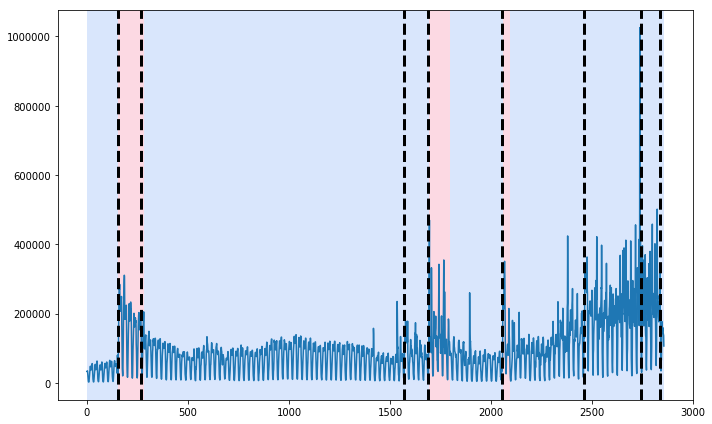

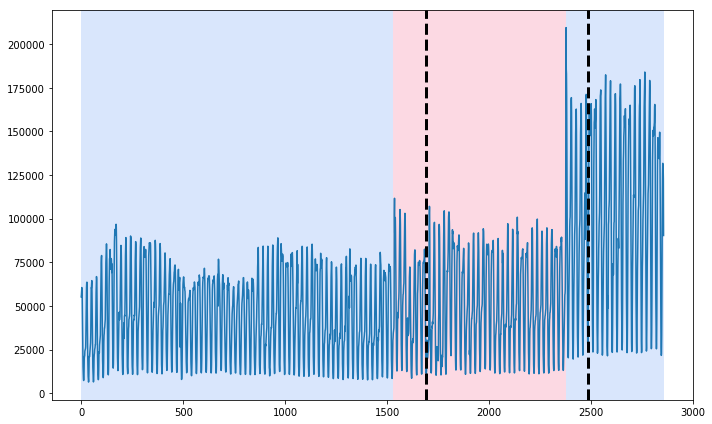

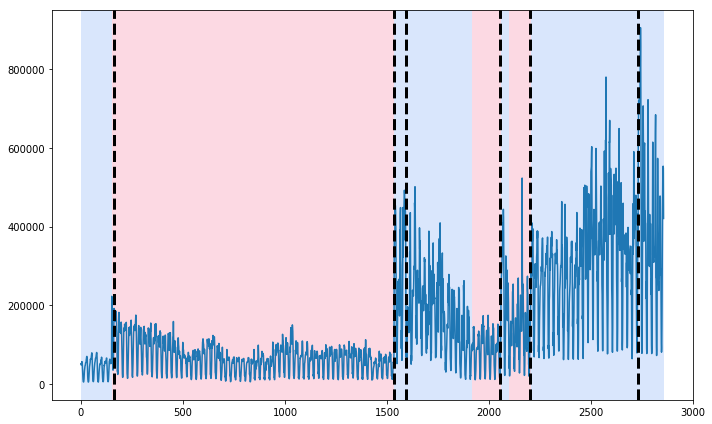

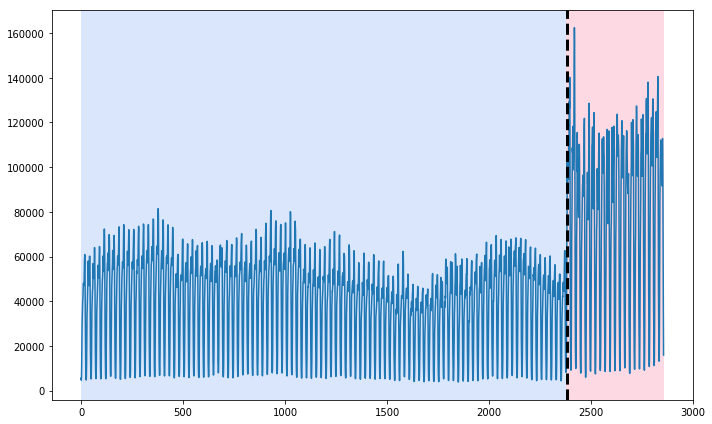

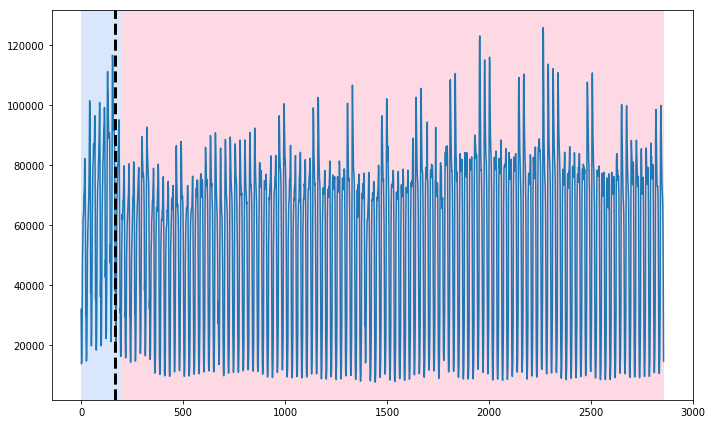

In [188]:
signal = np.array(df_a['imp'])
bkps_act = bkps_a
bkps_number = len(bkps_act)-1
algo = rpt.Window(model = 'l1', min_size=24, width=40).fit(signal)
bkps_pred = algo.predict(n_bkps=bkps_number)
rpt.show.display(signal, bkps_act, bkps_pred, figsize=(10, 6))
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/033_country_a_cp.png')
plt.show()

signal = np.array(df_b['imp'])
bkps_act = bkps_b
bkps_number = len(bkps_act)-1
algo = rpt.Window(model = 'l1', min_size=24, width=40).fit(signal)
bkps_pred = algo.predict(n_bkps=bkps_number)
rpt.show.display(signal, bkps_act, bkps_pred, figsize=(10, 6))
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/034_country_b_cp.png')
plt.show()

signal = np.array(df_c['imp'])
bkps_act = bkps_c
bkps_number = len(bkps_act)-1
algo = rpt.Window(model = 'l1', min_size=24, width=40).fit(signal)
bkps_pred = algo.predict(n_bkps=bkps_number)
rpt.show.display(signal, bkps_act, bkps_pred, figsize=(10, 6))
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/035_country_c_cp.png')
plt.show()

signal = np.array(df_d['imp'])
bkps_act = bkps_d
bkps_number = len(bkps_act)-1
algo = rpt.Window(model = 'l1', min_size=24, width=40).fit(signal)
bkps_pred = algo.predict(n_bkps=bkps_number)
rpt.show.display(signal, bkps_act, bkps_pred, figsize=(10, 6))
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/036_country_d_cp.png')
plt.show()

signal = np.array(df_e['imp'])
bkps_act = bkps_e
bkps_number = len(bkps_act)-1
algo = rpt.Window(model = 'l1', min_size=24, width=40).fit(signal)
bkps_pred = algo.predict(n_bkps=bkps_number)
rpt.show.display(signal, bkps_act, bkps_pred, figsize=(10, 6))
plt.savefig('/Users/klimmy/Klim/Statmod/Change point conference/ssa-cardiff-seminar/tex/images/037_country_e_cp.png')
plt.show()

In [176]:
def get_noise_var(signal):
    return(np.var(signal-np.mean(signal))**(1/2))
#     return(np.var(signal))

In [182]:
signal = np.array(df_a['imp'])
bkps_act = bkps_a
penalty = np.log(len(signal))*get_noise_var(signal)
algo = rpt.Window(model = 'l1', min_size=24, width = 40).fit(signal)
bkps_pred = algo.predict(pen=penalty)
print(' Country A \n Actual amount: {} \n Predicted amount: {} \n ==============='.format(len(bkps_act)-1, len(bkps_pred)))

signal = np.array(df_b['imp'])
bkps_act = bkps_b
penalty = np.log(len(signal))*get_noise_var(signal)
algo = rpt.Window(model = 'l1', min_size=24, width = 40).fit(signal)
bkps_pred = algo.predict(pen=penalty)
print(' Country B \n Actual amount: {} \n Predicted amount: {} \n ==============='.format(len(bkps_act)-1, len(bkps_pred)))

signal = np.array(df_c['imp'])
bkps_act = bkps_c
penalty = np.log(len(signal))*get_noise_var(signal)
algo = rpt.Window(model = 'l1', min_size=24, width = 40).fit(signal)
bkps_pred = algo.predict(pen=penalty)
print(' Country C \n Actual amount: {} \n Predicted amount: {} \n ==============='.format(len(bkps_act)-1, len(bkps_pred)))

signal = np.array(df_d['imp'])
bkps_act = bkps_d
penalty = np.log(len(signal))*get_noise_var(signal)
algo = rpt.Window(model = 'l1', min_size=24, width = 40).fit(signal)
bkps_pred = algo.predict(pen=penalty)
print(' Country D \n Actual amount: {} \n Predicted amount: {} \n ==============='.format(len(bkps_act)-1, len(bkps_pred)))

signal = np.array(df_e['imp'])
bkps_act = bkps_e
penalty = np.log(len(signal))*get_noise_var(signal)
algo = rpt.Window(model = 'l1', min_size=24, width = 40).fit(signal)
bkps_pred = algo.predict(pen=penalty)
print(' Country E \n Actual amount: {} \n Predicted amount: {} \n ==============='.format(len(bkps_act)-1, len(bkps_pred)))

 Country A 
 Actual amount: 8 
 Predicted amount: 5 
 Country B 
 Actual amount: 2 
 Predicted amount: 2 
 Country C 
 Actual amount: 6 
 Predicted amount: 6 
 Country D 
 Actual amount: 1 
 Predicted amount: 2 
 Country E 
 Actual amount: 1 
 Predicted amount: 1 


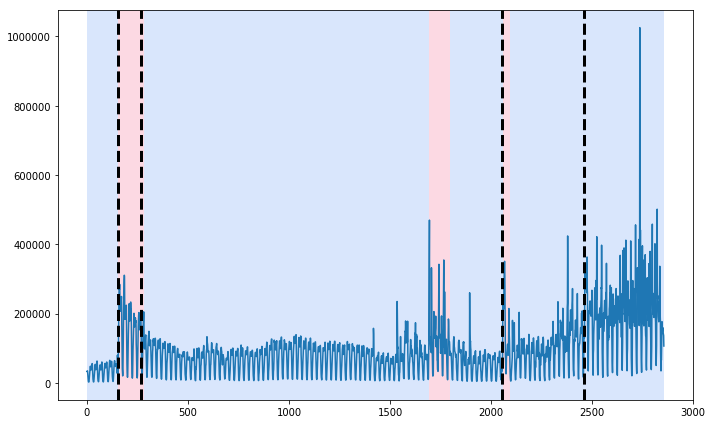

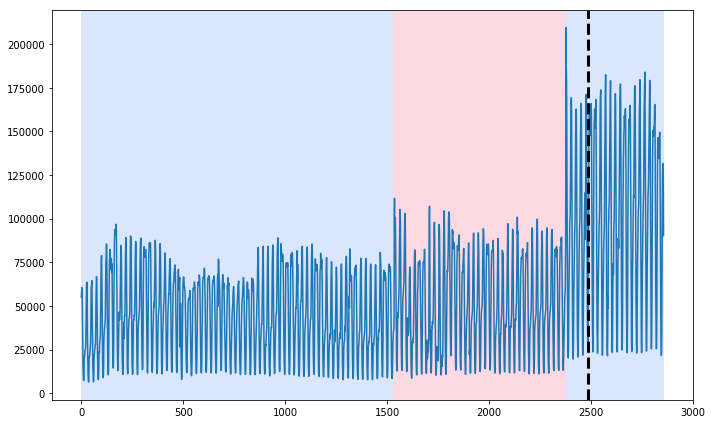

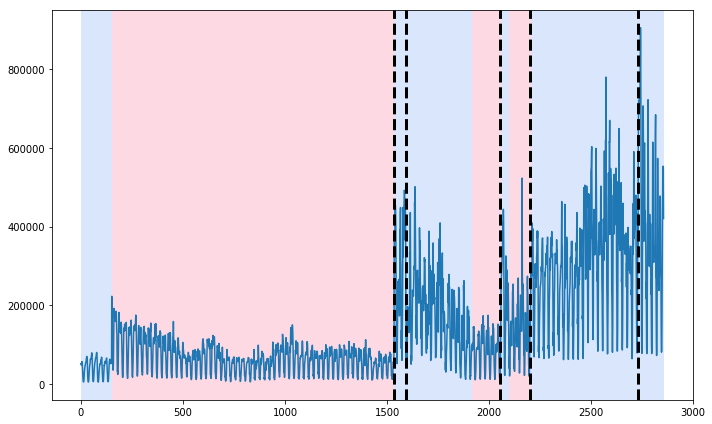

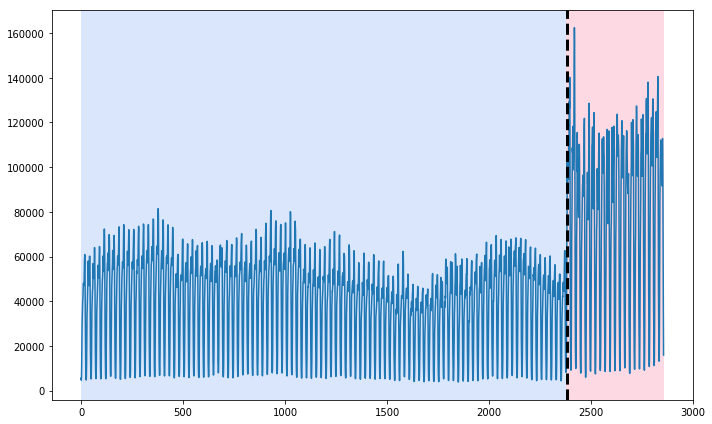

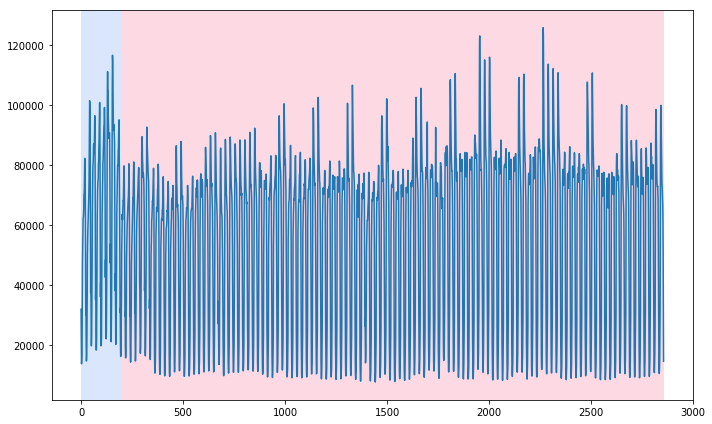

In [186]:
signal = np.array(df_a['imp'])
bkps_act = bkps_a
penalty = np.log(len(signal))*get_noise_var(signal)
algo = rpt.Window(model = 'l1', min_size=24, width=40).fit(signal)
bkps_pred = algo.predict(pen=penalty)
rpt.show.display(signal, bkps_act, bkps_pred, figsize=(10, 6))
plt.show()

signal = np.array(df_b['imp'])
bkps_act = bkps_b
penalty = np.log(len(signal))*get_noise_var(signal)
algo = rpt.Window(model = 'l1', min_size=24, width=40).fit(signal)
bkps_pred = algo.predict(pen=penalty)
rpt.show.display(signal, bkps_act, bkps_pred, figsize=(10, 6))
plt.show()

signal = np.array(df_c['imp'])
bkps_act = bkps_c
penalty = np.log(len(signal))*get_noise_var(signal)
algo = rpt.Window(model = 'l1', min_size=24, width=40).fit(signal)
bkps_pred = algo.predict(pen=penalty)
rpt.show.display(signal, bkps_act, bkps_pred, figsize=(10, 6))
plt.show()

signal = np.array(df_d['imp'])
bkps_act = bkps_d
penalty = np.log(len(signal))*get_noise_var(signal)
algo = rpt.Window(model = 'l1', min_size=24, width=40).fit(signal)
bkps_pred = algo.predict(pen=penalty)
rpt.show.display(signal, bkps_act, bkps_pred, figsize=(10, 6))
plt.show()

signal = np.array(df_e['imp'])
bkps_act = bkps_e
penalty = np.log(len(signal))*get_noise_var(signal)
algo = rpt.Window(model = 'l1', min_size=24, width=40).fit(signal)
bkps_pred = algo.predict(pen=penalty)
rpt.show.display(signal, bkps_act, bkps_pred, figsize=(10, 6))
plt.show()